<a href="https://colab.research.google.com/github/kayamui/istanbul_analysis/blob/main/ambulance_working_distances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ISTANBUL EUROPE'S CASE INTENSITY RECORDS FOR EACH AMBULANCE STATION**

- Map Area clipped for each station to calculate responsible area size
- Factors included to create a grand scoring
- Area gradiently colored based on the intensity score

In [ ]:
from IPython.display import display
display(m)

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import os
from sklearn.preprocessing import MinMaxScaler
from xlsx2csv import Xlsx2csv
from io import StringIO

In [ ]:
path= 'C:/Users/mkaya/Onedrive/Masaüstü/istanbul112_hidden/data/case_reports/europe/2024/monthly/'

In [ ]:
def read_excel(path: str, sheet_name: str) -> pd.DataFrame:
    buffer = StringIO()
    Xlsx2csv(path, outputencoding="utf-8", sheet_name=sheet_name).convert(buffer)
    buffer.seek(0)
    df = pd.read_csv(buffer)
    return df

In [ ]:
df3= read_excel(path+'1-OCAK 2024 AVR ASOS TANIDÖNÜŞTÜRÜLMÜŞ DEFTER.xlsx', '54230')
df4= read_excel(path+'2-ŞUBAT 2024 AVR ASOS TANIDÖNÜŞTÜRÜLMÜŞ DEFTER.xlsx', '48247')
df5= read_excel(path+'3-MART 2024 AVR ASOS TANIDÖNÜŞTÜRÜLMÜŞ DEFTER.xlsx', '49926')
df6= read_excel(path+'4-NİSAN 2024 AVR ASOS TANIDÖNÜŞTÜRÜLMÜŞ DEFTER.xlsx', 'NİSAN - 50.014')
df7= read_excel(path+'5-MAYIS 2024 AVR ASOS TANIDÖNÜŞTÜRÜLMÜŞ DEFTER.xlsx', '52340')
df9= read_excel(path+'7-TEMMUZ 2024 AVR ASOS TANIDÖNÜŞTÜRÜLMÜŞ DEFTER.xlsx', '55923 defter avrupa')
df11= read_excel(path+'9-EYLÜL 2024 AVR ASOS TANIDÖNÜŞTÜRÜLMÜŞ DEFTER.xlsx', '7 KALEM ACİL VAKA DEFTER-41.562')
df12= read_excel(path+'10-EKİM 2024 7 KALEM MAHALLE DEFTER AVRUPA 2024.xlsx', 'EKİM MAH. DEFTER - 43557')
df8= read_excel(path+'6-HAZİRAN 2024 AVR ASOS TANIDÖNÜŞTÜRÜLMÜŞ DEFTER.xlsx', '52852-DEFTER')
df10= read_excel(path+'8-AĞUSTOS 2024 AVR ASOS TANIDÖNÜŞTÜRÜLMÜŞ DEFTER.xlsx', '54070')
df13= read_excel(path+'11-KASIM 2024 AVR ASOS TANI DÖNÜŞTÜRÜLMÜŞ DEFTER.xlsx', '50903')
df14= read_excel(path+'12-ARALIK 2024 AVR ASOS TANIDÖNÜŞTÜRÜLMÜŞ DEFTER.xlsx', 53930)

C:\Users\mkaya\AppData\Local\Temp\ipykernel_11632\2819200740.py:5: DtypeWarning: Columns (116,117) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(buffer)
C:\Users\mkaya\AppData\Local\Temp\ipykernel_11632\2819200740.py:5: DtypeWarning: Columns (116,117,118,119,120,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(buffer)
C:\Users\mkaya\AppData\Local\Temp\ipykernel_11632\2819200740.py:5: DtypeWarning: Columns (8,117,118,119,120,121,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(buffer)
C:\Users\mkaya\AppData\Local\Temp\ipykernel_11632\2819200740.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(buffer)
C:\Users\mkaya\AppData\Local\Temp\ipykernel_11632\2819200740.py:5: DtypeWarning: Columns (117,118,119,120,121,122) have mixed types. Specify dtype option on import or set l

In [ ]:
df_avrupa= pd.concat([df3,df4, df5,df6, df7, df8, df9, df10, df11,df12, df13,df14])

In [ ]:
df_avrupa

,Sıra,Şehir,İlçe,İstasyon Adı,Ekip No,Tabletten Mi?,Ambulans Plaka,Araç Tür,Palet Kullanim,MANUEL ŞEF TARİHİ,İhbar/Çağrı Tarihi,İhbar/Çağrı Saati,İstasyon İçin Vaka Kapatma Süresi (Vaka Veriliş - İlk KKM'ye gönderim),İstasyon İçin Vaka Kapatma Zamanı,İstasyon İçin Vaka Kapatma Saati\n,Komuta Onay,KKM Protokol,KKM Seri no,ATN No,Ekip Sorumlusu,Ekipteki Kişiler,Tc Kimlik No\n,Hasta Adı,Hasta Soyadı,Cinsiyet,Güvence,Güvence Durumu,Hasta Uyruk,Yeni Doğan,Yaş,Adli Vaka,Kamp Durumu,Vaka Adresi,İhbar Adresi,Vaka Yeri Aciklama,Bölge,Kensel/Kırsal,Vaka Formu Dosyası\n,Dosya Sayısı,Çağrı Nedeni,Sonuç,Sonuç Detay,Nakledilen Hastane,Sevk Eden Hastane,Sevk Edilen İl (İl Dışı ise),Sevk Edilen Hastane,Teslim Alan\nDoktor,Reddeden Hastane,Nakil Sebebi,Nakli Reddeden Doktor,Tanı Türü,ICD10 TANI KODU,ICD10 TANI\nADI,ICD10 2'NCİ\n SEVİYE TANI KODU,ICD10 2'NCİ SEVİYE GRUP ADI,ICD10 1'İNCİ SEVİYE TANI KODU,MANUEL ICD DÜZENLEME,ICD10 1'İNCİ SEVİYE GRUP ADI,Triaj,Bilinç,Pupiller,Solunum,Cilt,Nabız,Telefon,İhbar veren,Arayan,Vaka Veriliş\nTarihi,Vaka Veriliş\nSaati,Vakaya Çıkış Tarihi,Vakaya Çıkış Saati,Olay Yeri Varış Tarihi,Olay Yeri Varış Saati,Vakaya Varış\n Tarihi,Vakaya Varış\n Saati,Olay Yeri Ayrılış Tarihi,Olay Yeri Ayrılış Saati,Hastaneye Varış Tarihi,Hastaneye Varış Saati\n,Hastaneden Ayrılış Tarihi,Hastaneden Ayrılış Saati,İstasyona Dönüş Tarihi,İstasyona Dönüş Saati\n,Komuta Reaksiyon Sn,İstasyon Reaksiyon Sn,Ulaşım Sn\n(Olay Yeri Varış Tarihi - Çağrı Tarihi),Ulaşım Sn\n(Olay Yeri Varış Tarihi - Vaka Veriliş Tarihi),Müdahale Süresi Sn,Hastane Teslim Süresi Sn,Meşguliyet Süresi Sn,Çıkış KM,Varış Km,Hastaneye Varış Km,Dönüş KM,KKM Açıklama,İstasyon Açıklama,Olay\nAçıklaması,Toplam Tutar,Vakanın Enlemi,Vakanın Boylamı,İstasyonun Enlemi,İstasyonun Boylamı,Tansiyon,Glukoz,Ateş,Diğer,SPO2,Solunum Değeri,Nabız Değeri,Vaka Geç Ulaşım Nedeni,Islak Imza,Doktor Onay Durum,Yaş Detay\n,Unnamed: 113,Unnamed: 114,Onaylayan Doktor T.C Kimlik No,Tabletten Gönderilme Tarihi\n,Tabletten Gönderilme Saati\n,Doktorun Sorguladığı Tarih\n,Doktorun Sorguladığı Saat,Doktor Onay Tarihi,Doktor Onay Saati\n,Doktor Onayı Sorgulama Tarihi,Doktor Onayı Sorgulama Saati,MANUEL ŞEF TARİH,MANUEL ŞEF,MANUEL DÜZENLENMİŞ Nakledilen Hastane,MANUEL DÜZENLEME Nakledilen Hastane,İhbar İli,İhbar İlçesi,İhbar Mahallesi,Olay Yeri
0,15,İSTANBUL,SİLİVRİ,İSTANBUL SİLİVRİ 5 NOLU ASHİ,SLV5,Evet,34YB6372,Panelvan,NaN,12-31-23,01-01-2024,00:00:33,0 Gün 0 Saat 54 Dakika,01-01-2024,00:55:39,Onaylı,55578472,12901106,K191289,AYLİN FATMA ERDOĞAN,"EYÜP TEREKLİ - Yardımcı Sağlık Personeli, AYLİ...",10691959594,EMİRHAN,ALTUN,ERKEK,SGK,Haksahibi,TÜRKİYE CUMHURİYETİ,-,17,-,-,NaN,İSTANBUL\nselimpaşa dh--T.C. SAĞLIK BAKANLI...,selimpaşa dh--T.C. SAĞLIK BAKANLIĞI SİLİVRİ DE...,Bölge İçi,Kentsel,Var,0,Nakil,Nakil - Hastaneler Arası,-,-,T.C. SAĞLIK BAKANLIĞI SİLİVRİ DEVLET HASTANESİ,-,T.C. SAĞLIK BAKANLIĞI SİLİVRİ DEVLET HASTANESİ,-,-,Uzman Hekim İhtiyacı,-,Ana Ön Tanı,G40,EPİLEPSİ,G40-G47,EPİZODİK VE PAROKSİSMAL BOZUKLUKLAR,G00-G99,SİNİR SİSTEMİ HAST.,SİNİR SİSTEMİ HASTALIKLARI,Sarı Kod,Açık,Normal,Düzenli,Normal,Düzenli,NaN,NAK DİSP.DUDU GÜNEY,NaN,01-01-2024,00:01:27,01-01-2024,00:02:20,01-01-2024,00:06:33,01-01-2024,00:06:41,01-01-2024,00:18:51,01-01-2024,00:30:36,01-01-2024,00:39:41,01-01-2024,00:52:00,54,53,360,306,738,545,2980,388604,388605,388617,388628,NaN,NaN,NAKİL,1723.0,-,-,41.054300,28.379130,11/7,-,-,-,100,-,110,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,İSTANBUL,ÇATALCA,İSTANBUL ÇATALCA 5 NOLU ACİL SAĞLIK HİZMETLERİ...,ÇTL5,Evet,34YB5067,Panelvan,NaN,12-31-23,01-01-2024,00:01:50,27 Gün 19 Saat 59 Dakika,28-01-2024,20:05:00,Onaylı,55578505,12901199,K237280,İBRAHİM KUTLU,"MUHAMMED AYDEMİR - Yardımcı Sağlık Personeli, ...",16132438154,MURAT,KOÇ,ERKEK,SGK,Haksahibi,TÜRKİYE CUMHURİYETİ,-,27,-,-,NaN,Çağlayan Ege Sk. Ferhatpaşa Mh. Çatalca İSTANB...,kiptaş begonya konutları B134 blok d:1 \n,Bölge İçi,Kentsel,Var,0,Medikal,Nakil - Hastaneye,-,T.C. S

In [ ]:
%run find_rural.py
%run find_district.py

In [ ]:
station_locations= pd.read_excel('C:/Users/mkaya/Onedrive/Masaüstü/istanbul112_hidden/data/locations/station_locations.xlsx')

In [ ]:
station_locations.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
station_locations.rename(columns={'city':'İLÇE_ARGE', 'district':'MAHALLE_ARGE'}, inplace=True)

In [ ]:
station_locations

,Ekip Adı,lat,lon,Bölge,İLÇE_ARGE,MAHALLE_ARGE,station_count,rural,double_station,double_station_with
0,ARN1,41.177852,28.745802,ARN,ARNAVUTKÖY,ARNAVUTKÖY MERKEZ,1,KENTSEL,False,NaN
1,ARN2,41.156037,28.623824,ARN,ARNAVUTKÖY,HADIMKÖY,1,KENTSEL,False,NaN
2,ARN3,41.204411,28.716732,ARN,ARNAVUTKÖY,MAREŞAL FEVZİ ÇAKMAK,1,KENTSEL,False,NaN
3,ARN4,41.199450,28.760639,ARN,ARNAVUTKÖY,HİCRET,1,KENTSEL,False,NaN
4,ARN6,41.185858,28.708606,ARN,ARNAVUTKÖY,TAŞOLUK,1,KENTSEL,False,NaN
...,...,...,...,...,...,...,...,...,...,...
207,ZTB7,41.006756,28.897603,ZTB,ZEYTİNBURNU,SEYİTNİZAM,1,KENTSEL,False,NaN
208,ARN5,41.265160,28.688026,ARN,ARNAVUTKÖY,TAYAKADIN,1,KIRSAL,False,NaN
209,ÇTL4,41.413472,28.186711,ÇTL,ÇATALCA,FATİH,1,KIRSAL,False,NaN
210,EYP6,41.253788,28.714775,EYP,ARNAVUTKÖY,TAYAKADIN,1,KIRSAL,True,EYP7


In [ ]:
df_ambulances= pd.merge(df_avrupa, station_locations, left_on='Ekip No', right_on='Ekip Adı', how='inner')

In [ ]:
df_ambulances.head()

,Sıra,Şehir,İlçe,İstasyon Adı,Ekip No,Tabletten Mi?,Ambulans Plaka,Araç Tür,Palet Kullanim,MANUEL ŞEF TARİHİ,İhbar/Çağrı Tarihi,İhbar/Çağrı Saati,İstasyon İçin Vaka Kapatma Süresi (Vaka Veriliş - İlk KKM'ye gönderim),İstasyon İçin Vaka Kapatma Zamanı,İstasyon İçin Vaka Kapatma Saati\n,Komuta Onay,KKM Protokol,KKM Seri no,ATN No,Ekip Sorumlusu,Ekipteki Kişiler,Tc Kimlik No\n,Hasta Adı,Hasta Soyadı,Cinsiyet,Güvence,Güvence Durumu,Hasta Uyruk,Yeni Doğan,Yaş,Adli Vaka,Kamp Durumu,Vaka Adresi,İhbar Adresi,Vaka Yeri Aciklama,Bölge_x,Kensel/Kırsal,Vaka Formu Dosyası\n,Dosya Sayısı,Çağrı Nedeni,Sonuç,Sonuç Detay,Nakledilen Hastane,Sevk Eden Hastane,Sevk Edilen İl (İl Dışı ise),Sevk Edilen Hastane,Teslim Alan\nDoktor,Reddeden Hastane,Nakil Sebebi,Nakli Reddeden Doktor,Tanı Türü,ICD10 TANI KODU,ICD10 TANI\nADI,ICD10 2'NCİ\n SEVİYE TANI KODU,ICD10 2'NCİ SEVİYE GRUP ADI,ICD10 1'İNCİ SEVİYE TANI KODU,MANUEL ICD DÜZENLEME,ICD10 1'İNCİ SEVİYE GRUP ADI,Triaj,Bilinç,Pupiller,Solunum,Cilt,Nabız,Telefon,İhbar veren,Arayan,Vaka Veriliş\nTarihi,Vaka Veriliş\nSaati,Vakaya Çıkış Tarihi,Vakaya Çıkış Saati,Olay Yeri Varış Tarihi,Olay Yeri Varış Saati,Vakaya Varış\n Tarihi,Vakaya Varış\n Saati,Olay Yeri Ayrılış Tarihi,Olay Yeri Ayrılış Saati,Hastaneye Varış Tarihi,Hastaneye Varış Saati\n,Hastaneden Ayrılış Tarihi,Hastaneden Ayrılış Saati,İstasyona Dönüş Tarihi,İstasyona Dönüş Saati\n,Komuta Reaksiyon Sn,İstasyon Reaksiyon Sn,Ulaşım Sn\n(Olay Yeri Varış Tarihi - Çağrı Tarihi),Ulaşım Sn\n(Olay Yeri Varış Tarihi - Vaka Veriliş Tarihi),Müdahale Süresi Sn,Hastane Teslim Süresi Sn,Meşguliyet Süresi Sn,Çıkış KM,Varış Km,Hastaneye Varış Km,Dönüş KM,KKM Açıklama,İstasyon Açıklama,Olay\nAçıklaması,Toplam Tutar,Vakanın Enlemi,Vakanın Boylamı,İstasyonun Enlemi,İstasyonun Boylamı,Tansiyon,Glukoz,Ateş,Diğer,SPO2,Solunum Değeri,Nabız Değeri,Vaka Geç Ulaşım Nedeni,Islak Imza,Doktor Onay Durum,Yaş Detay\n,Unnamed: 113,Unnamed: 114,Onaylayan Doktor T.C Kimlik No,Tabletten Gönderilme Tarihi\n,Tabletten Gönderilme Saati\n,Doktorun Sorguladığı Tarih\n,Doktorun Sorguladığı Saat,Doktor Onay Tarihi,Doktor Onay Saati\n,Doktor Onayı Sorgulama Tarihi,Doktor Onayı Sorgulama Saati,MANUEL ŞEF TARİH,MANUEL ŞEF,MANUEL DÜZENLENMİŞ Nakledilen Hastane,MANUEL DÜZENLEME Nakledilen Hastane,İhbar İli,İhbar İlçesi,İhbar Mahallesi,Olay Yeri,Ekip Adı,lat,lon,Bölge_y,İLÇE_ARGE,MAHALLE_ARGE,station_count,rural,double_station,double_station_with
0,15,İSTANBUL,SİLİVRİ,İSTANBUL SİLİVRİ 5 NOLU ASHİ,SLV5,Evet,34YB6372,Panelvan,NaN,12-31-23,01-01-2024,00:00:33,0 Gün 0 Saat 54 Dakika,01-01-2024,00:55:39,Onaylı,55578472,12901106,K191289,AYLİN FATMA ERDOĞAN,"EYÜP TEREKLİ - Yardımcı Sağlık Personeli, AYLİ...",10691959594,EMİRHAN,ALTUN,ERKEK,SGK,Haksahibi,TÜRKİYE CUMHURİYETİ,-,17,-,-,NaN,İSTANBUL\nselimpaşa dh--T.C. SAĞLIK BAKANLI...,selimpaşa dh--T.C. SAĞLIK BAKANLIĞI SİLİVRİ DE...,Bölge İçi,Kentsel,Var,0,Nakil,Nakil - Hastaneler Arası,-,-,T.C. SAĞLIK BAKANLIĞI SİLİVRİ DEVLET HASTANESİ,-,T.C. SAĞLIK BAKANLIĞI SİLİVRİ DEVLET HASTANESİ,-,-,Uzman Hekim İhtiyacı,-,Ana Ön Tanı,G40,EPİLEPSİ,G40-G47,EPİZODİK VE PAROKSİSMAL BOZUKLUKLAR,G00-G99,SİNİR SİSTEMİ HAST.,SİNİR SİSTEMİ HASTALIKLARI,Sarı Kod,Açık,Normal,Düzenli,Normal,Düzenli,NaN,NAK DİSP.DUDU GÜNEY,NaN,01-01-2024,00:01:27,01-01-2024,00:02:20,01-01-2024,00:06:33,01-01-2024,00:06:41,01-01-2024,00:18:51,01-01-2024,00:30:36,01-01-2024,00:39:41,01-01-2024,00:52:00,54,53,360,306,738,545,2980,388604,388605,388617,388628,NaN,NaN,NAKİL,1723.0,-,-,41.054300,28.379130,11/7,-,-,-,100,-,110,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SLV5,41.054326,28.379685,SLV,SİLİVRİ,SELİMPAŞA,1,KENTSEL,False,NaN
1,4,İSTANBUL,ÇATALCA,İSTANBUL ÇATALCA 5 NOLU ACİL SAĞLIK HİZMETLERİ...,ÇTL5,Evet,34YB5067,Panelvan,NaN,12-31-23,01-01-2024,00:01:50,27 Gün 19 Saat 59 Dakika,28-01-2024,20:05:00,Onaylı,55578505,12901199,K237280,İBRAHİM KUTLU,"MUHAMMED AYDEMİR - Yardımcı Sağlık Personeli, ...",16132438154,MURAT,KOÇ,ERKEK,SGK,Haksahibi,TÜRKİYE CUM

In [ ]:
import geopy.distance

In [ ]:
df_ambulances['Vakanın Boylamı'].isna().sum()

0

In [ ]:
import geopy.distance

# Iterate through each row and calculate the distance
distances = []
for index in df_ambulances.index:
    coords_1 = (df_ambulances.loc[index, 'Vakanın Enlemi'], df_ambulances.loc[index, 'Vakanın Boylamı'])
    coords_2 = (df_ambulances.loc[index, 'lat'], df_ambulances.loc[index, 'lon'])
    try:
      distance = geopy.distance.geodesic(coords_1, coords_2).km
      distances.append(distance)
    except:
      distances.append(np.nan)

# Add distances as a new column to your DataFrame
df_ambulances['distance'] = distances

print(df_ambulances[['Vakanın Enlemi', 'Vakanın Boylamı', 'lat', 'lon', 'distance']].head()) # Print a few rows to inspect the results

C:\Users\mkaya\anaconda3\Lib\site-packages\geopy\point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


  Vakanın Enlemi Vakanın Boylamı        lat        lon  distance
0              -               -  41.054326  28.379685       NaN
1      41.128883       28.460603  41.148288  28.454200  2.221106
2              -               -  41.000132  28.851708       NaN
3      41.026296        28.93994  41.024201  28.936458  0.374027
4      41.044715       29.007728  41.052072  29.008147  0.817816


In [ ]:
df_ambulances['distance'].isna().sum()

70867

In [ ]:
df_distances= df_ambulances[df_ambulances['distance'].notna()].copy()

In [ ]:
df_distances['distance']= df_distances['distance'].round(2)

In [ ]:
df_distances['case_count']= 1

In [ ]:
df_avrupa['case_count']= 1

In [ ]:
df_avrupa['Vaka Veriliş Tarih Saat']= pd.to_datetime(df_avrupa['Vaka Veriliş\nTarihi'] + ' '  + df_avrupa['Vaka Veriliş\nSaati'], format='%d-%m-%Y %H:%M:%S')
df_avrupa['Olay Yeri Varış Tarih Saat']= pd.to_datetime(df_avrupa['Olay Yeri Varış Tarihi'] + ' ' + df_avrupa['Olay Yeri Varış Saati'], format='%d-%m-%Y %H:%M:%S')
df_avrupa['Hastaneye Varış Tarih Saat']= pd.to_datetime(df_avrupa['Hastaneye Varış Tarihi'] + ' ' + df_avrupa['Hastaneye Varış Saati\n'], format='%d-%m-%Y %H:%M:%S', errors= 'ignore')
df_avrupa['İstasyona Dönüş Tarih Saat']= pd.to_datetime(df_avrupa['İstasyona Dönüş Tarihi'] + ' ' + df_avrupa['İstasyona Dönüş Saati\n'], format='%d-%m-%Y %H:%M:%S', errors= 'ignore')

C:\Users\mkaya\AppData\Local\Temp\ipykernel_11632\897416792.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df_avrupa['Hastaneye Varış Tarih Saat']= pd.to_datetime(df_avrupa['Hastaneye Varış Tarihi'] + ' ' + df_avrupa['Hastaneye Varış Saati\n'], format='%d-%m-%Y %H:%M:%S', errors= 'ignore')
C:\Users\mkaya\AppData\Local\Temp\ipykernel_11632\897416792.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df_avrupa['İstasyona Dönüş Tarih Saat']= pd.to_datetime(df_avrupa['İstasyona Dönüş Tarihi'] + ' ' + df_avrupa['İstasyona Dönüş Saati\n'], format='%d-%m-%Y %H:%M:%S', errors= 'ignore')


In [ ]:
case_counts= df_avrupa.groupby('Ekip No').agg({'case_count':'sum'}).reset_index()
case_counts

,Ekip No,case_count
0,ARN1,2719
1,ARN2,2054
2,ARN3,2628
3,ARN4,2471
4,ARN5,1649
...,...,...
218,ŞİŞ5,3056
219,ŞİŞ6,3297
220,ŞİŞ7,2448
221,ŞİŞ8,3014


In [ ]:
df_distances['Ulaşım Sn\n(Olay Yeri Varış Tarihi - Vaka Veriliş Tarihi)']= df_distances['Ulaşım Sn\n(Olay Yeri Varış Tarihi - Vaka Veriliş Tarihi)'] / 60
df_distances.rename(columns={'Ulaşım Sn\n(Olay Yeri Varış Tarihi - Vaka Veriliş Tarihi)':'Ulaşım (Dakika)'}, inplace=True)
df_distances['Ulaşım (Dakika)']= df_distances['Ulaşım (Dakika)'].round(2)

In [ ]:
df_distances= df_distances[df_distances['Sonuç'].isin(['Asılsız İhbar', 'Başka Araçla Nakil','Ex - Yerinde Bırakıldı', 'Görev İptali', 'Nakil - Hastaneye', 'Nakil - Red','Yaralı Yok', 'Yerinde Müdahale'])]

In [ ]:
df_distances

,Sıra,Şehir,İlçe,İstasyon Adı,Ekip No,Tabletten Mi?,Ambulans Plaka,Araç Tür,Palet Kullanim,MANUEL ŞEF TARİHİ,İhbar/Çağrı Tarihi,İhbar/Çağrı Saati,İstasyon İçin Vaka Kapatma Süresi (Vaka Veriliş - İlk KKM'ye gönderim),İstasyon İçin Vaka Kapatma Zamanı,İstasyon İçin Vaka Kapatma Saati\n,Komuta Onay,KKM Protokol,KKM Seri no,ATN No,Ekip Sorumlusu,Ekipteki Kişiler,Tc Kimlik No\n,Hasta Adı,Hasta Soyadı,Cinsiyet,Güvence,Güvence Durumu,Hasta Uyruk,Yeni Doğan,Yaş,Adli Vaka,Kamp Durumu,Vaka Adresi,İhbar Adresi,Vaka Yeri Aciklama,Bölge_x,Kensel/Kırsal,Vaka Formu Dosyası\n,Dosya Sayısı,Çağrı Nedeni,Sonuç,Sonuç Detay,Nakledilen Hastane,Sevk Eden Hastane,Sevk Edilen İl (İl Dışı ise),Sevk Edilen Hastane,Teslim Alan\nDoktor,Reddeden Hastane,Nakil Sebebi,Nakli Reddeden Doktor,Tanı Türü,ICD10 TANI KODU,ICD10 TANI\nADI,ICD10 2'NCİ\n SEVİYE TANI KODU,ICD10 2'NCİ SEVİYE GRUP ADI,ICD10 1'İNCİ SEVİYE TANI KODU,MANUEL ICD DÜZENLEME,ICD10 1'İNCİ SEVİYE GRUP ADI,Triaj,Bilinç,Pupiller,Solunum,Cilt,Nabız,Telefon,İhbar veren,Arayan,Vaka Veriliş\nTarihi,Vaka Veriliş\nSaati,Vakaya Çıkış Tarihi,Vakaya Çıkış Saati,Olay Yeri Varış Tarihi,Olay Yeri Varış Saati,Vakaya Varış\n Tarihi,Vakaya Varış\n Saati,Olay Yeri Ayrılış Tarihi,Olay Yeri Ayrılış Saati,Hastaneye Varış Tarihi,Hastaneye Varış Saati\n,Hastaneden Ayrılış Tarihi,Hastaneden Ayrılış Saati,İstasyona Dönüş Tarihi,İstasyona Dönüş Saati\n,Komuta Reaksiyon Sn,İstasyon Reaksiyon Sn,Ulaşım Sn\n(Olay Yeri Varış Tarihi - Çağrı Tarihi),Ulaşım (Dakika),Müdahale Süresi Sn,Hastane Teslim Süresi Sn,Meşguliyet Süresi Sn,Çıkış KM,Varış Km,Hastaneye Varış Km,Dönüş KM,KKM Açıklama,İstasyon Açıklama,Olay\nAçıklaması,Toplam Tutar,Vakanın Enlemi,Vakanın Boylamı,İstasyonun Enlemi,İstasyonun Boylamı,Tansiyon,Glukoz,Ateş,Diğer,SPO2,Solunum Değeri,Nabız Değeri,Vaka Geç Ulaşım Nedeni,Islak Imza,Doktor Onay Durum,Yaş Detay\n,Unnamed: 113,Unnamed: 114,Onaylayan Doktor T.C Kimlik No,Tabletten Gönderilme Tarihi\n,Tabletten Gönderilme Saati\n,Doktorun Sorguladığı Tarih\n,Doktorun Sorguladığı Saat,Doktor Onay Tarihi,Doktor Onay Saati\n,Doktor Onayı Sorgulama Tarihi,Doktor Onayı Sorgulama Saati,MANUEL ŞEF TARİH,MANUEL ŞEF,MANUEL DÜZENLENMİŞ Nakledilen Hastane,MANUEL DÜZENLEME Nakledilen Hastane,İhbar İli,İhbar İlçesi,İhbar Mahallesi,Olay Yeri,Ekip Adı,lat,lon,Bölge_y,İLÇE_ARGE,MAHALLE_ARGE,station_count,rural,double_station,double_station_with,distance,case_count
1,4,İSTANBUL,ÇATALCA,İSTANBUL ÇATALCA 5 NOLU ACİL SAĞLIK HİZMETLERİ...,ÇTL5,Evet,34YB5067,Panelvan,NaN,12-31-23,01-01-2024,00:01:50,27 Gün 19 Saat 59 Dakika,28-01-2024,20:05:00,Onaylı,55578505,12901199,K237280,İBRAHİM KUTLU,"MUHAMMED AYDEMİR - Yardımcı Sağlık Personeli, ...",16132438154,MURAT,KOÇ,ERKEK,SGK,Haksahibi,TÜRKİYE CUMHURİYETİ,-,27,-,-,NaN,Çağlayan Ege Sk. Ferhatpaşa Mh. Çatalca İSTANB...,kiptaş begonya konutları B134 blok d:1 \n,Bölge İçi,Kentsel,Var,0,Medikal,Nakil - Hastaneye,-,T.C. SAĞLIK BAKANLIĞI ÇATALCA İLYAS ÇOKAY DEVL...,-,-,-,-,-,İleri Özelleşmiş Hekim İhtiyacı,-,Ana Ön Tanı,R07.3,"GÖĞÜS AĞRISI, DİĞER",R00-R09,DOLAŞIM VE SOLUNUM SİSTEMİNE AİT SEMPTOM VE BE...,R00-R99,SEMPTOMLAR VE ANORMAL KLİNİK VE LABORT. BULGULARI,"SEMPTOMLAR, BELİRTİLER VE ANORMAL KLİNİK VE LA...",Sarı Kod,Açık,Normal,Düzenli,Normal,Düzenli,05350836105,B.DISP. FADİME MİNİK ERDOĞAN,NaN,01-01-2024,00:05:05,01-01-2024,00:05:22,01-01-2024,00:12:43,01-01-2024,00:12:48,01-01-2024,00:15:56,01-01-2024,00:28:00,01-01-2024,00:34:00,01-01-2024,00:36:00,195,17,653,7.63,193,360,1838,402823,402826,402828,402830,27y E/ Çarpıntı + Epiglotit \nBilinen Hastalık...,NaN,MEDİKAL,1761.0,41.128883,28.460603,41.146349,28.453238,120/80,-,-,-,98,16,80,-,Islak İmza İle İlgili Bir İşlem Yapılmamıştır,Doktor Hasta Bilgisi Sorgulamamıştır,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ÇTL5,41.148288,28.454200,ÇTL,ÇATALCA,KALEİÇİ,1,KENTSEL,True,ÇTL1,2.22,1
3,1,İSTANBUL,FATİH,İSTANBUL FATİH 2 NOLU ASHİ,FTH2,Evet,34YB5022,Panelvan,NaN,12-31-23,01-01-2024,00:01:58,3 Gün 14 Saat 2 Dakika,04

In [ ]:
station_locations.rename(columns={'Ekip Adı':'Ekip No'}, inplace=True)

In [ ]:
rural_stations= station_locations[station_locations['Bölge'].isin(['ARN', 'ÇTL', 'EYP', 'SLV', 'SRY', 'BÇK'])]
urban_stations= station_locations[~(station_locations['Bölge'].isin(['ARN', 'ÇTL', 'EYP', 'SLV', 'SRY', 'BÇK']))]

In [ ]:
rural_stations

,Ekip No,lat,lon,Bölge,İLÇE_ARGE,MAHALLE_ARGE,station_count,rural,double_station,double_station_with
0,ARN1,41.177852,28.745802,ARN,ARNAVUTKÖY,ARNAVUTKÖY MERKEZ,1,KENTSEL,False,NaN
1,ARN2,41.156037,28.623824,ARN,ARNAVUTKÖY,HADIMKÖY,1,KENTSEL,False,NaN
2,ARN3,41.204411,28.716732,ARN,ARNAVUTKÖY,MAREŞAL FEVZİ ÇAKMAK,1,KENTSEL,False,NaN
3,ARN4,41.199450,28.760639,ARN,ARNAVUTKÖY,HİCRET,1,KENTSEL,False,NaN
4,ARN6,41.185858,28.708606,ARN,ARNAVUTKÖY,TAŞOLUK,1,KENTSEL,False,NaN
5,ARN7,41.207845,28.731628,ARN,ARNAVUTKÖY,YAVUZ SELİM,1,KENTSEL,False,NaN
39,BÇK1,41.012768,28.600169,BÇK,BÜYÜKÇEKMECE,ATATÜRK,1,KENTSEL,False,NaN
40,BÇK2,41.039725,28.429292,BÇK,BÜYÜKÇEKMECE,KAMİLOBA,1,KENTSEL,False,NaN
41,BÇK3,41.050220,28.514436,BÇK,BÜYÜKÇEKMECE,TÜRKOBA,1,KENTSEL,False,NaN
42,BÇK4,41.014726,28.555592,BÇK,BÜYÜKÇEKMECE,MİMARSİNAN,1,KENTSEL,False,NaN


In [ ]:
urban_stations

,Ekip No,lat,lon,Bölge,İLÇE_ARGE,MAHALLE_ARGE,station_count,rural,double_station,double_station_with
6,AVC1,40.980025,28.722873,AVC,AVCILAR,MERKEZ,1,KENTSEL,True,AVC7
7,AVC2,41.010602,28.710685,AVC,AVCILAR,FİRUZKÖY,1,KENTSEL,False,NaN
8,AVC3,40.985468,28.728710,AVC,AVCILAR,GÜMÜŞPALA,1,KENTSEL,False,NaN
9,AVC4,40.993372,28.700557,AVC,AVCILAR,CİHANGİR,1,KENTSEL,False,NaN
10,AVC5,40.972249,28.716522,AVC,AVCILAR,AMBARLI,1,KENTSEL,False,NaN
...,...,...,...,...,...,...,...,...,...,...
203,ZTB3,41.020178,28.907205,ZTB,ZEYTİNBURNU,MALTEPE,1,KENTSEL,False,NaN
204,ZTB4,41.002479,28.916886,ZTB,ZEYTİNBURNU,KAZLIÇEŞME,1,KENTSEL,True,ZTB1
205,ZTB5,40.994816,28.893825,ZTB,ZEYTİNBURNU,VELİEFENDİ,1,KENTSEL,False,NaN
206,ZTB6,40.985964,28.896265,ZTB,ZEYTİNBURNU,SÜMER,1,KENTSEL,False,NaN


In [ ]:
df_distances['case_count']

1         1
3         1
4         1
5         1
6         1
         ..
606143    1
606144    1
606145    1
606146    1
606147    1
Name: case_count, Length: 523137, dtype: int64

In [ ]:
df_distances.groupby('Ekip No').agg({'case_count':'sum'}).reset_index()

,Ekip No,case_count
0,ARN1,2438
1,ARN2,1789
2,ARN3,2259
3,ARN4,2106
4,ARN5,1246
...,...,...
207,ŞİŞ5,2738
208,ŞİŞ6,2917
209,ŞİŞ7,2144
210,ŞİŞ8,2677


In [ ]:
# Calculate the total case count for each 'Ekip No'
case_counts_by_ekip = df_distances.groupby('Ekip No')['case_count'].sum()

# Filter the original DataFrame based on the case counts
filtered_df_distances = df_distances[df_distances['Ekip No'].isin(case_counts_by_ekip[case_counts_by_ekip > 100].index)]

# Now you can work with the filtered DataFrame:
filtered_df_distances

,Sıra,Şehir,İlçe,İstasyon Adı,Ekip No,Tabletten Mi?,Ambulans Plaka,Araç Tür,Palet Kullanim,MANUEL ŞEF TARİHİ,İhbar/Çağrı Tarihi,İhbar/Çağrı Saati,İstasyon İçin Vaka Kapatma Süresi (Vaka Veriliş - İlk KKM'ye gönderim),İstasyon İçin Vaka Kapatma Zamanı,İstasyon İçin Vaka Kapatma Saati\n,Komuta Onay,KKM Protokol,KKM Seri no,ATN No,Ekip Sorumlusu,Ekipteki Kişiler,Tc Kimlik No\n,Hasta Adı,Hasta Soyadı,Cinsiyet,Güvence,Güvence Durumu,Hasta Uyruk,Yeni Doğan,Yaş,Adli Vaka,Kamp Durumu,Vaka Adresi,İhbar Adresi,Vaka Yeri Aciklama,Bölge_x,Kensel/Kırsal,Vaka Formu Dosyası\n,Dosya Sayısı,Çağrı Nedeni,Sonuç,Sonuç Detay,Nakledilen Hastane,Sevk Eden Hastane,Sevk Edilen İl (İl Dışı ise),Sevk Edilen Hastane,Teslim Alan\nDoktor,Reddeden Hastane,Nakil Sebebi,Nakli Reddeden Doktor,Tanı Türü,ICD10 TANI KODU,ICD10 TANI\nADI,ICD10 2'NCİ\n SEVİYE TANI KODU,ICD10 2'NCİ SEVİYE GRUP ADI,ICD10 1'İNCİ SEVİYE TANI KODU,MANUEL ICD DÜZENLEME,ICD10 1'İNCİ SEVİYE GRUP ADI,Triaj,Bilinç,Pupiller,Solunum,Cilt,Nabız,Telefon,İhbar veren,Arayan,Vaka Veriliş\nTarihi,Vaka Veriliş\nSaati,Vakaya Çıkış Tarihi,Vakaya Çıkış Saati,Olay Yeri Varış Tarihi,Olay Yeri Varış Saati,Vakaya Varış\n Tarihi,Vakaya Varış\n Saati,Olay Yeri Ayrılış Tarihi,Olay Yeri Ayrılış Saati,Hastaneye Varış Tarihi,Hastaneye Varış Saati\n,Hastaneden Ayrılış Tarihi,Hastaneden Ayrılış Saati,İstasyona Dönüş Tarihi,İstasyona Dönüş Saati\n,Komuta Reaksiyon Sn,İstasyon Reaksiyon Sn,Ulaşım Sn\n(Olay Yeri Varış Tarihi - Çağrı Tarihi),Ulaşım (Dakika),Müdahale Süresi Sn,Hastane Teslim Süresi Sn,Meşguliyet Süresi Sn,Çıkış KM,Varış Km,Hastaneye Varış Km,Dönüş KM,KKM Açıklama,İstasyon Açıklama,Olay\nAçıklaması,Toplam Tutar,Vakanın Enlemi,Vakanın Boylamı,İstasyonun Enlemi,İstasyonun Boylamı,Tansiyon,Glukoz,Ateş,Diğer,SPO2,Solunum Değeri,Nabız Değeri,Vaka Geç Ulaşım Nedeni,Islak Imza,Doktor Onay Durum,Yaş Detay\n,Unnamed: 113,Unnamed: 114,Onaylayan Doktor T.C Kimlik No,Tabletten Gönderilme Tarihi\n,Tabletten Gönderilme Saati\n,Doktorun Sorguladığı Tarih\n,Doktorun Sorguladığı Saat,Doktor Onay Tarihi,Doktor Onay Saati\n,Doktor Onayı Sorgulama Tarihi,Doktor Onayı Sorgulama Saati,MANUEL ŞEF TARİH,MANUEL ŞEF,MANUEL DÜZENLENMİŞ Nakledilen Hastane,MANUEL DÜZENLEME Nakledilen Hastane,İhbar İli,İhbar İlçesi,İhbar Mahallesi,Olay Yeri,Ekip Adı,lat,lon,Bölge_y,İLÇE_ARGE,MAHALLE_ARGE,station_count,rural,double_station,double_station_with,distance,case_count
1,4,İSTANBUL,ÇATALCA,İSTANBUL ÇATALCA 5 NOLU ACİL SAĞLIK HİZMETLERİ...,ÇTL5,Evet,34YB5067,Panelvan,NaN,12-31-23,01-01-2024,00:01:50,27 Gün 19 Saat 59 Dakika,28-01-2024,20:05:00,Onaylı,55578505,12901199,K237280,İBRAHİM KUTLU,"MUHAMMED AYDEMİR - Yardımcı Sağlık Personeli, ...",16132438154,MURAT,KOÇ,ERKEK,SGK,Haksahibi,TÜRKİYE CUMHURİYETİ,-,27,-,-,NaN,Çağlayan Ege Sk. Ferhatpaşa Mh. Çatalca İSTANB...,kiptaş begonya konutları B134 blok d:1 \n,Bölge İçi,Kentsel,Var,0,Medikal,Nakil - Hastaneye,-,T.C. SAĞLIK BAKANLIĞI ÇATALCA İLYAS ÇOKAY DEVL...,-,-,-,-,-,İleri Özelleşmiş Hekim İhtiyacı,-,Ana Ön Tanı,R07.3,"GÖĞÜS AĞRISI, DİĞER",R00-R09,DOLAŞIM VE SOLUNUM SİSTEMİNE AİT SEMPTOM VE BE...,R00-R99,SEMPTOMLAR VE ANORMAL KLİNİK VE LABORT. BULGULARI,"SEMPTOMLAR, BELİRTİLER VE ANORMAL KLİNİK VE LA...",Sarı Kod,Açık,Normal,Düzenli,Normal,Düzenli,05350836105,B.DISP. FADİME MİNİK ERDOĞAN,NaN,01-01-2024,00:05:05,01-01-2024,00:05:22,01-01-2024,00:12:43,01-01-2024,00:12:48,01-01-2024,00:15:56,01-01-2024,00:28:00,01-01-2024,00:34:00,01-01-2024,00:36:00,195,17,653,7.63,193,360,1838,402823,402826,402828,402830,27y E/ Çarpıntı + Epiglotit \nBilinen Hastalık...,NaN,MEDİKAL,1761.0,41.128883,28.460603,41.146349,28.453238,120/80,-,-,-,98,16,80,-,Islak İmza İle İlgili Bir İşlem Yapılmamıştır,Doktor Hasta Bilgisi Sorgulamamıştır,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ÇTL5,41.148288,28.454200,ÇTL,ÇATALCA,KALEİÇİ,1,KENTSEL,True,ÇTL1,2.22,1
3,1,İSTANBUL,FATİH,İSTANBUL FATİH 2 NOLU ASHİ,FTH2,Evet,34YB5022,Panelvan,NaN,12-31-23,01-01-2024,00:01:58,3 Gün 14 Saat 2 Dakika,04

In [ ]:
station_locations_filtered= station_locations[~(station_locations['Ekip No'].isin(case_counts_by_ekip[case_counts_by_ekip < 150].index))]

In [ ]:
station_locations_filtered

,Ekip No,lat,lon,Bölge,İLÇE_ARGE,MAHALLE_ARGE,station_count,rural,double_station,double_station_with
0,ARN1,41.177852,28.745802,ARN,ARNAVUTKÖY,ARNAVUTKÖY MERKEZ,1,KENTSEL,False,NaN
1,ARN2,41.156037,28.623824,ARN,ARNAVUTKÖY,HADIMKÖY,1,KENTSEL,False,NaN
2,ARN3,41.204411,28.716732,ARN,ARNAVUTKÖY,MAREŞAL FEVZİ ÇAKMAK,1,KENTSEL,False,NaN
3,ARN4,41.199450,28.760639,ARN,ARNAVUTKÖY,HİCRET,1,KENTSEL,False,NaN
4,ARN6,41.185858,28.708606,ARN,ARNAVUTKÖY,TAŞOLUK,1,KENTSEL,False,NaN
...,...,...,...,...,...,...,...,...,...,...
207,ZTB7,41.006756,28.897603,ZTB,ZEYTİNBURNU,SEYİTNİZAM,1,KENTSEL,False,NaN
208,ARN5,41.265160,28.688026,ARN,ARNAVUTKÖY,TAYAKADIN,1,KIRSAL,False,NaN
209,ÇTL4,41.413472,28.186711,ÇTL,ÇATALCA,FATİH,1,KIRSAL,False,NaN
210,EYP6,41.253788,28.714775,EYP,ARNAVUTKÖY,TAYAKADIN,1,KIRSAL,True,EYP7


In [ ]:
stations_df= station_locations.copy()

In [ ]:
cases_df= df_distances.copy()

In [ ]:
# 🔹 Load the GeoJSON file (Istanbul European Side Boundary)
gdf = gpd.read_file(geojson_path)

# 🔹 Convert station points to a GeoDataFrame
station_gdf = gpd.GeoDataFrame(
    stations_df, geometry=gpd.points_from_xy(stations_df['lon'], stations_df['lat']), crs="EPSG:4326"
)

# 🔹 Convert cases to a GeoDataFrame
cases_gdf = gpd.GeoDataFrame(
    cases_df, geometry=gpd.points_from_xy(cases_df['Vakanın Boylamı'], cases_df['Vakanın Enlemi']), crs="EPSG:4326"
)

In [ ]:
cases_gdf

,Sıra,Şehir,İlçe,İstasyon Adı,Ekip No,Tabletten Mi?,Ambulans Plaka,Araç Tür,Palet Kullanim,MANUEL ŞEF TARİHİ,İhbar/Çağrı Tarihi,İhbar/Çağrı Saati,İstasyon İçin Vaka Kapatma Süresi (Vaka Veriliş - İlk KKM'ye gönderim),İstasyon İçin Vaka Kapatma Zamanı,İstasyon İçin Vaka Kapatma Saati\n,Komuta Onay,KKM Protokol,KKM Seri no,ATN No,Ekip Sorumlusu,Ekipteki Kişiler,Tc Kimlik No\n,Hasta Adı,Hasta Soyadı,Cinsiyet,Güvence,Güvence Durumu,Hasta Uyruk,Yeni Doğan,Yaş,Adli Vaka,Kamp Durumu,Vaka Adresi,İhbar Adresi,Vaka Yeri Aciklama,Bölge_x,Kensel/Kırsal,Vaka Formu Dosyası\n,Dosya Sayısı,Çağrı Nedeni,Sonuç,Sonuç Detay,Nakledilen Hastane,Sevk Eden Hastane,Sevk Edilen İl (İl Dışı ise),Sevk Edilen Hastane,Teslim Alan\nDoktor,Reddeden Hastane,Nakil Sebebi,Nakli Reddeden Doktor,Tanı Türü,ICD10 TANI KODU,ICD10 TANI\nADI,ICD10 2'NCİ\n SEVİYE TANI KODU,ICD10 2'NCİ SEVİYE GRUP ADI,ICD10 1'İNCİ SEVİYE TANI KODU,MANUEL ICD DÜZENLEME,ICD10 1'İNCİ SEVİYE GRUP ADI,Triaj,Bilinç,Pupiller,Solunum,Cilt,Nabız,Telefon,İhbar veren,Arayan,Vaka Veriliş\nTarihi,Vaka Veriliş\nSaati,Vakaya Çıkış Tarihi,Vakaya Çıkış Saati,Olay Yeri Varış Tarihi,Olay Yeri Varış Saati,Vakaya Varış\n Tarihi,Vakaya Varış\n Saati,Olay Yeri Ayrılış Tarihi,Olay Yeri Ayrılış Saati,Hastaneye Varış Tarihi,Hastaneye Varış Saati\n,Hastaneden Ayrılış Tarihi,Hastaneden Ayrılış Saati,İstasyona Dönüş Tarihi,İstasyona Dönüş Saati\n,Komuta Reaksiyon Sn,İstasyon Reaksiyon Sn,Ulaşım Sn\n(Olay Yeri Varış Tarihi - Çağrı Tarihi),Ulaşım (Dakika),Müdahale Süresi Sn,Hastane Teslim Süresi Sn,Meşguliyet Süresi Sn,Çıkış KM,Varış Km,Hastaneye Varış Km,Dönüş KM,KKM Açıklama,İstasyon Açıklama,Olay\nAçıklaması,Toplam Tutar,Vakanın Enlemi,Vakanın Boylamı,İstasyonun Enlemi,İstasyonun Boylamı,Tansiyon,Glukoz,Ateş,Diğer,SPO2,Solunum Değeri,Nabız Değeri,Vaka Geç Ulaşım Nedeni,Islak Imza,Doktor Onay Durum,Yaş Detay\n,Unnamed: 113,Unnamed: 114,Onaylayan Doktor T.C Kimlik No,Tabletten Gönderilme Tarihi\n,Tabletten Gönderilme Saati\n,Doktorun Sorguladığı Tarih\n,Doktorun Sorguladığı Saat,Doktor Onay Tarihi,Doktor Onay Saati\n,Doktor Onayı Sorgulama Tarihi,Doktor Onayı Sorgulama Saati,MANUEL ŞEF TARİH,MANUEL ŞEF,MANUEL DÜZENLENMİŞ Nakledilen Hastane,MANUEL DÜZENLEME Nakledilen Hastane,İhbar İli,İhbar İlçesi,İhbar Mahallesi,Olay Yeri,Ekip Adı,lat,lon,Bölge_y,İLÇE_ARGE,MAHALLE_ARGE,station_count,rural,double_station,double_station_with,distance,case_count,geometry
1,4,İSTANBUL,ÇATALCA,İSTANBUL ÇATALCA 5 NOLU ACİL SAĞLIK HİZMETLERİ...,ÇTL5,Evet,34YB5067,Panelvan,NaN,12-31-23,01-01-2024,00:01:50,27 Gün 19 Saat 59 Dakika,28-01-2024,20:05:00,Onaylı,55578505,12901199,K237280,İBRAHİM KUTLU,"MUHAMMED AYDEMİR - Yardımcı Sağlık Personeli, ...",16132438154,MURAT,KOÇ,ERKEK,SGK,Haksahibi,TÜRKİYE CUMHURİYETİ,-,27,-,-,NaN,Çağlayan Ege Sk. Ferhatpaşa Mh. Çatalca İSTANB...,kiptaş begonya konutları B134 blok d:1 \n,Bölge İçi,Kentsel,Var,0,Medikal,Nakil - Hastaneye,-,T.C. SAĞLIK BAKANLIĞI ÇATALCA İLYAS ÇOKAY DEVL...,-,-,-,-,-,İleri Özelleşmiş Hekim İhtiyacı,-,Ana Ön Tanı,R07.3,"GÖĞÜS AĞRISI, DİĞER",R00-R09,DOLAŞIM VE SOLUNUM SİSTEMİNE AİT SEMPTOM VE BE...,R00-R99,SEMPTOMLAR VE ANORMAL KLİNİK VE LABORT. BULGULARI,"SEMPTOMLAR, BELİRTİLER VE ANORMAL KLİNİK VE LA...",Sarı Kod,Açık,Normal,Düzenli,Normal,Düzenli,05350836105,B.DISP. FADİME MİNİK ERDOĞAN,NaN,01-01-2024,00:05:05,01-01-2024,00:05:22,01-01-2024,00:12:43,01-01-2024,00:12:48,01-01-2024,00:15:56,01-01-2024,00:28:00,01-01-2024,00:34:00,01-01-2024,00:36:00,195,17,653,7.63,193,360,1838,402823,402826,402828,402830,27y E/ Çarpıntı + Epiglotit \nBilinen Hastalık...,NaN,MEDİKAL,1761.0,41.128883,28.460603,41.146349,28.453238,120/80,-,-,-,98,16,80,-,Islak İmza İle İlgili Bir İşlem Yapılmamıştır,Doktor Hasta Bilgisi Sorgulamamıştır,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ÇTL5,41.148288,28.454200,ÇTL,ÇATALCA,KALEİÇİ,1,KENTSEL,True,ÇTL1,2.22,1,POINT (28.46060 41.12888)
3,1,İSTANBUL,FATİH,İSTANBUL FATİH 2 NOLU ASHİ,FTH2,Evet,34YB5022,Panelvan,NaN,12-31-23,01-01-2024

In [ ]:
df_distances.head(1000).to_excel('test.xlsx')

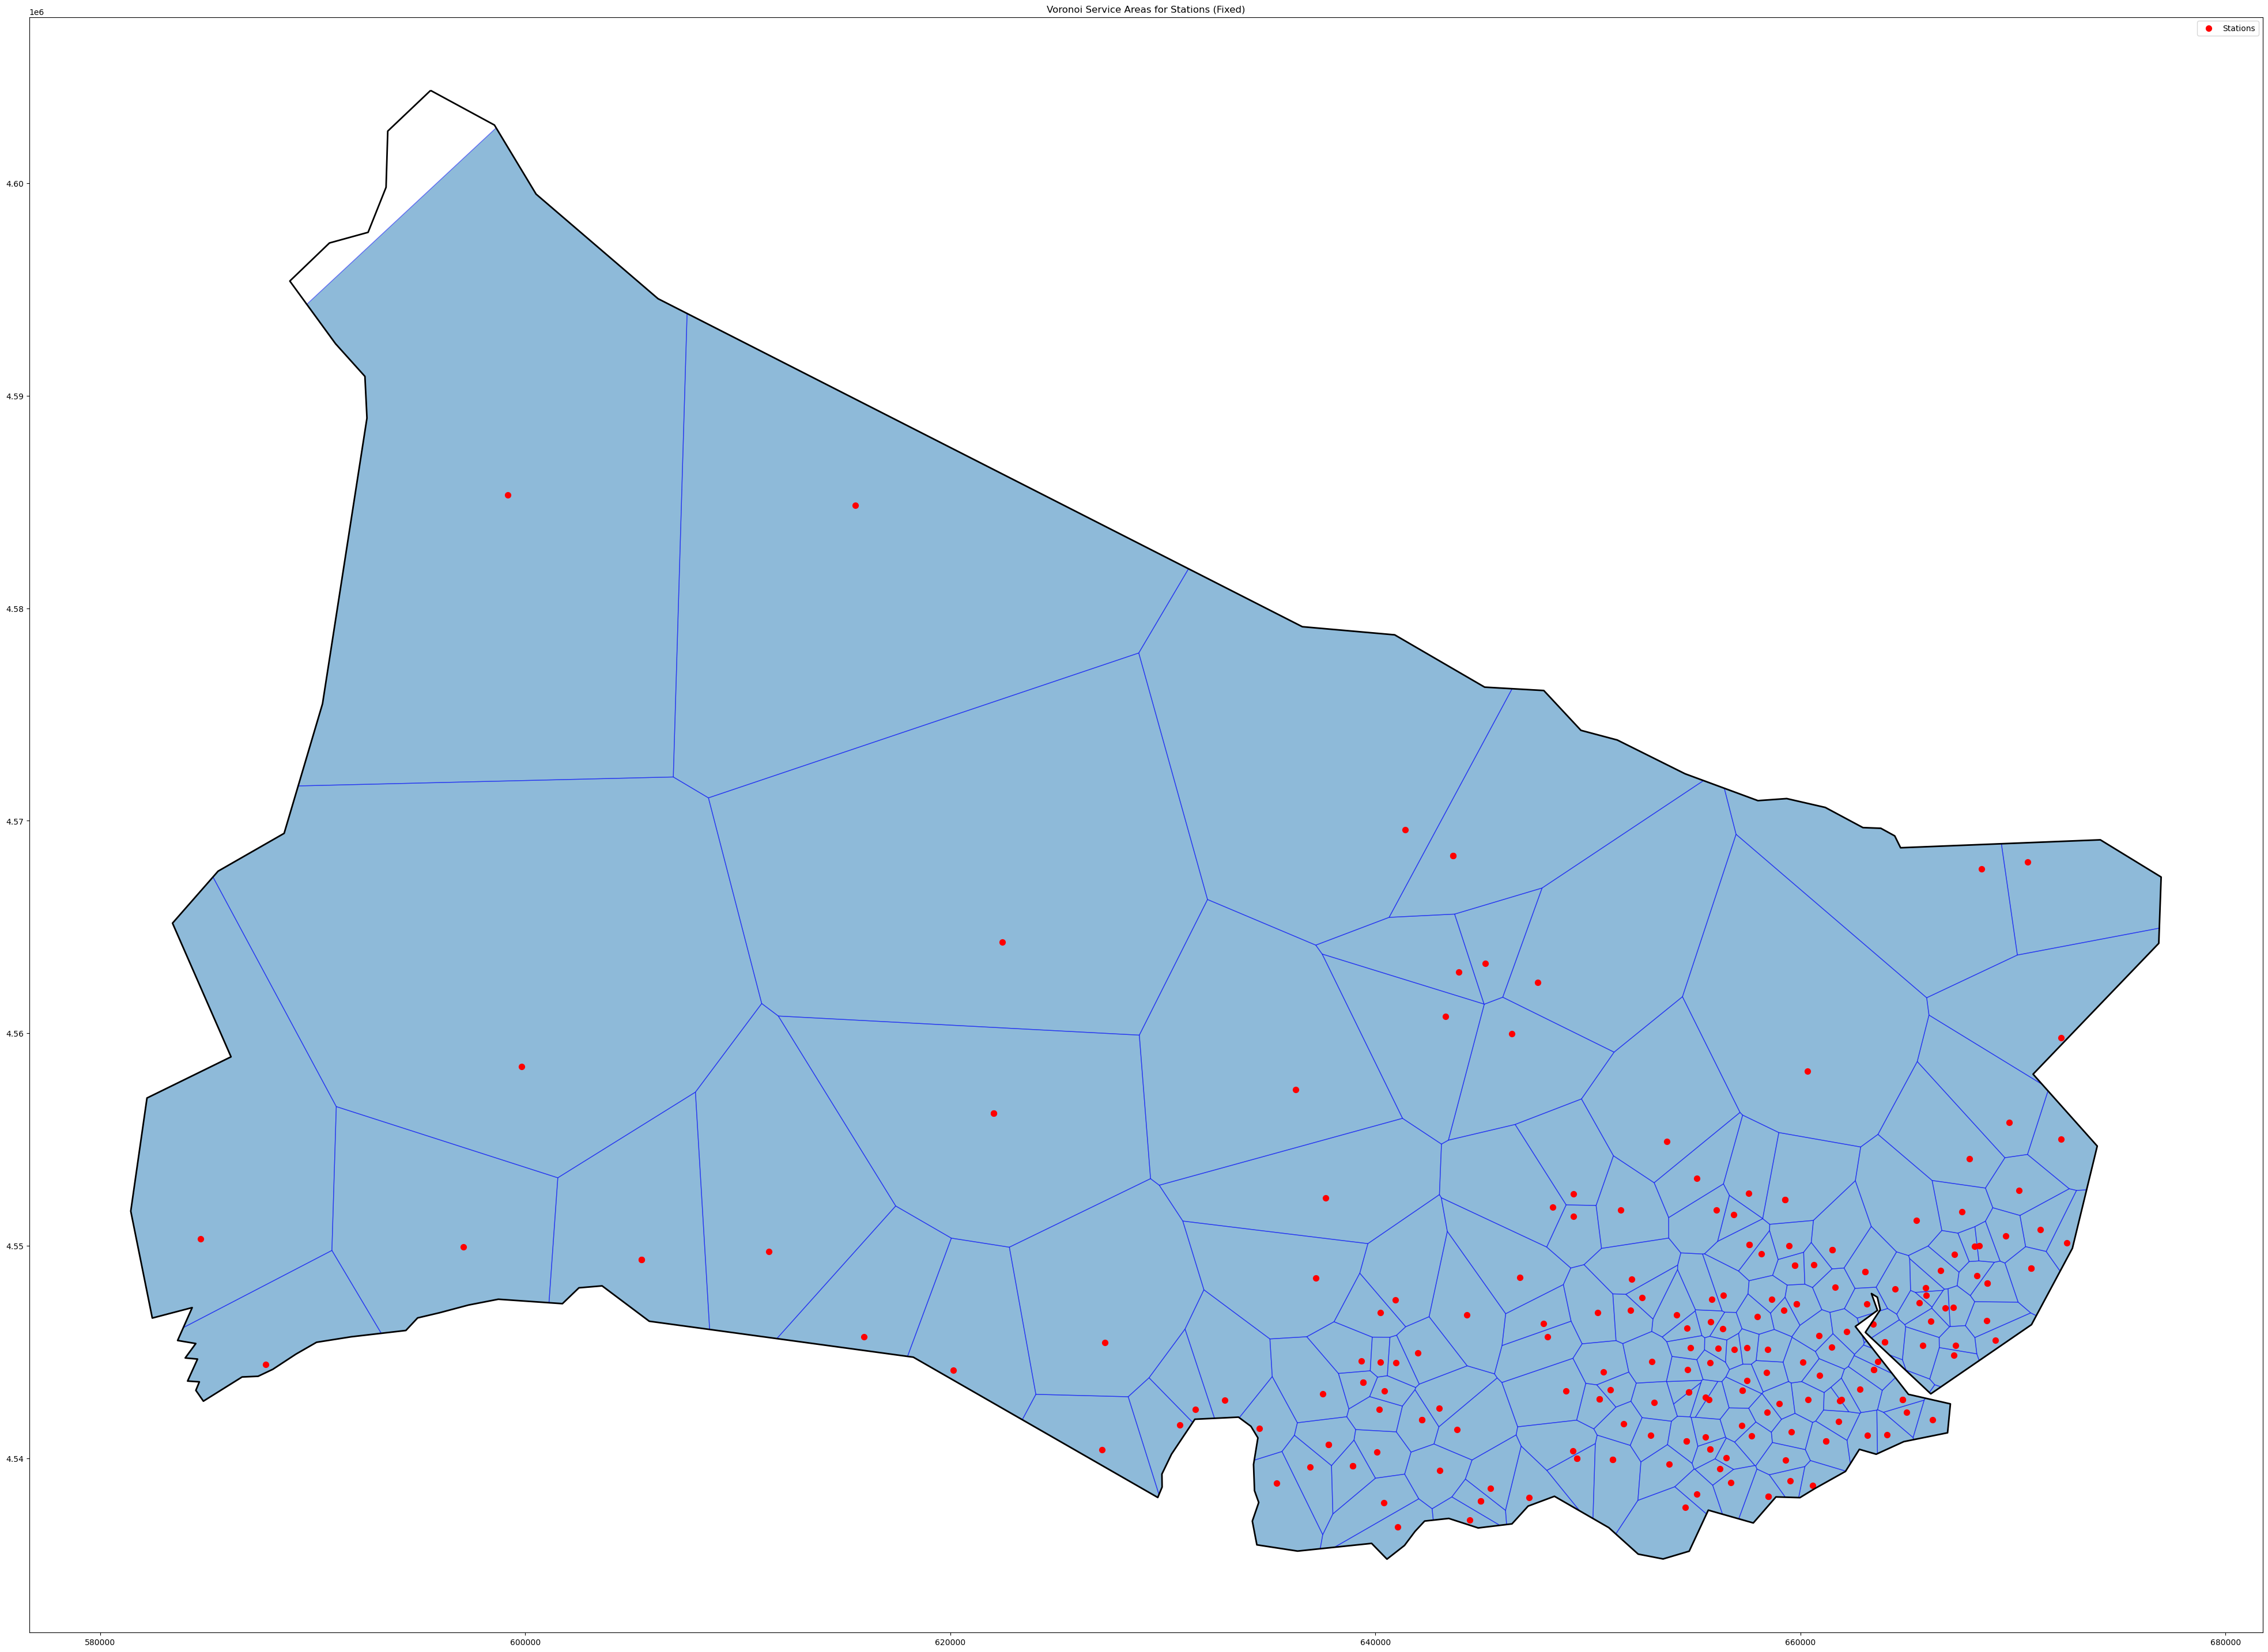

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point, MultiPoint
from scipy.spatial import Voronoi
import numpy as np

def create_voronoi_map(geojson_path, stations_path):
    # Load the GeoJSON file
    gdf = gpd.read_file(geojson_path)

    # Load station locations
    stations_df = pd.read_excel(stations_path)

    # Convert station points to a GeoDataFrame
    station_gdf = gpd.GeoDataFrame(
        stations_df, geometry=gpd.points_from_xy(stations_df['lon'], stations_df['lat']), crs="EPSG:4326"
    )

    # Convert to projected coordinate system for Voronoi accuracy
    gdf = gdf.to_crs(epsg=32635)  # UTM Zone 35N (suitable for Istanbul)
    station_gdf = station_gdf.to_crs(epsg=32635)

    # Extract station coordinates
    points = np.array(list(zip(station_gdf.geometry.x, station_gdf.geometry.y)))

    # Add artificial boundary points to ensure complete coverage
    boundary_points = np.array([
        [gdf.total_bounds[0], gdf.total_bounds[1]],  # Bottom-left
        [gdf.total_bounds[2], gdf.total_bounds[1]],  # Bottom-right
        [gdf.total_bounds[2], gdf.total_bounds[3]],  # Top-right
        [gdf.total_bounds[0], gdf.total_bounds[3]]   # Top-left
    ])

    all_points = np.vstack([points, boundary_points])

    # Compute Voronoi diagram
    vor = Voronoi(all_points)

    # Convert Voronoi regions to polygons
    voronoi_polygons = []
    for region in vor.regions:
        if not -1 in region and len(region) > 0:
            polygon = Polygon([vor.vertices[i] for i in region])
            voronoi_polygons.append(polygon)

    # Create a GeoDataFrame for Voronoi regions
    voronoi_gdf = gpd.GeoDataFrame(geometry=voronoi_polygons, crs="EPSG:32635")

    # Intersect Voronoi regions with the area boundary
    clipped_voronoi = gpd.overlay(voronoi_gdf, gdf, how='intersection')

    clipped_voronoi["area_km2"] = clipped_voronoi.geometry.area / 10**6

    # Plot the map
    fig, ax = plt.subplots(figsize=(50, 50))
    gdf.boundary.plot(ax=ax, color='black', linewidth=2)
    clipped_voronoi.plot(ax=ax, alpha=0.5, edgecolor='blue')
    station_gdf.plot(ax=ax, color='red', markersize=50, label='Stations')

    plt.legend()
    plt.title("Voronoi Service Areas for Stations (Fixed)")
    plt.show()

if __name__ == "__main__":
    geojson_file = "C:/Users/mkaya/Downloads/istanbul_europe.geojson"  # Update with actual file path
    stations_file = "C:/Users/mkaya/Onedrive/Masaüstü/istanbul112_hidden/data/locations/station_locations.xlsx"
    create_voronoi_map(geojson_file, stations_file)


In [ ]:
df_distances.rename(columns={'MAHALLE_ARGE':'station_neighbourhood', 'İLÇE_ARGE':'station_district'}, inplace=True)

In [ ]:
istanbul_population_density= pd.read_csv('C:/Users/mkaya/Onedrive/Masaüstü/istanbul112_hidden/data/populations/istanbul_population_density.csv')

In [ ]:
df_distances['station_neighbourhood']

1                       KALEİÇİ
3                 HIRKA-İ ŞERİF
4                             -
5                    KAPTANPAŞA
6                    KAPTANPAŞA
                  ...          
606143                 KAYABAŞI
606144               KARTALTEPE
606145         YENİBOSNA MERKEZ
606146    NECİP FAZIL KISAKÜREK
606147                HACIAHMET
Name: station_neighbourhood, Length: 523137, dtype: object

In [ ]:
import pandas as pd
import numpy as np

def get_age_interval(row):
  try:
    # Attempt conversion to float; if successful, it's likely numeric
    age = float(row['Yaş'])  # Use float to handle potential decimal values
    if 0 <= age < 18:
      return '0-17'
    elif 18 <= age < 65:
      return '18-64'
    elif age >= 65:
      return '65+'
  except ValueError:
    # If conversion fails, assign pd.NA
    pass
  return 'No Patient'

df_distances['patient_age_interval'] = df_distances.apply(get_age_interval, axis=1)

In [ ]:
df_distances['station_district']= df_distances['station_district'].astype(str).str.strip()
df_distances['station_neighbourhood']= df_distances['station_neighbourhood'].astype(str).str.strip()


In [ ]:
df_distances['station_district']= df_distances['station_district'].apply(lambda x: 'FATİH' if x=='İSTANBUL' else x )

In [ ]:
df_patient_density= df_distances.groupby(['station_district','station_neighbourhood','patient_age_interval']).size().reset_index(name='miktar').sort_values(by=['station_district','station_neighbourhood', 'miktar'], ascending=[True,True,False])

In [ ]:
df_patient_density['percentage_in_district'] = df_patient_density.groupby(['station_district', 'station_neighbourhood'])['miktar'].transform(lambda x: x / x.sum())

In [ ]:
temp_df= pd.DataFrame()
for district, group in df_patient_density.groupby(['station_district', 'station_neighbourhood']):
  group['percentage']=( group['miktar']/group['miktar'].sum()) * 100
  temp_df= pd.concat([group, temp_df])

In [ ]:
df_patient_density= temp_df.copy()

In [ ]:
df_patient_density.rename(columns={'percentage':'percentage(in_neighbourhood)'}, inplace=True)

In [ ]:
df_patient_density.describe()

,miktar,percentage_in_district,percentage(in_neighbourhood)
count,660.000000,660.000000,660.000000
mean,792.631818,0.250000,25.000000
std,664.948811,0.162575,16.257510
min,10.000000,0.007582,0.758150
25%,315.250000,0.118711,11.871077
50%,585.500000,0.202140,20.213981
75%,1089.000000,0.402321,40.232084
max,4275.000000,0.803639,80.363912


In [ ]:
df_patient_density

,station_district,station_neighbourhood,patient_age_interval,miktar,percentage_in_district,percentage(in_neighbourhood)
657,ŞİŞLİ,YAYLA,18-64,1104,0.412402,41.240194
658,ŞİŞLİ,YAYLA,65+,774,0.289130,28.912962
659,ŞİŞLİ,YAYLA,No Patient,681,0.254389,25.438924
656,ŞİŞLİ,YAYLA,0-17,118,0.044079,4.407919
653,ŞİŞLİ,MERKEZ,18-64,1166,0.425858,42.585829
...,...,...,...,...,...,...
4,ARNAVUTKÖY,HADIMKÖY,0-17,127,0.070989,7.098938
1,ARNAVUTKÖY,ARNAVUTKÖY MERKEZ,18-64,1309,0.536916,53.691550
2,ARNAVUTKÖY,ARNAVUTKÖY MERKEZ,65+,528,0.216571,21.657096
3,ARNAVUTKÖY,ARNAVUTKÖY MERKEZ,No Patient,344,0.141099,14.109926


In [ ]:
istanbul_population_density

,Sıra,Mahalle,Ilce,Nüfus Yogunlugu (kisi/km2),Nüfus,Yüzölçümü (km2)
0,1,Yeşiltepe,Zeytinburnu,96576,21679,0.22
1,2,Fatih,Esenler,89562,45797,0.51
2,3,Mareşal Fevzi Çakmak,Güngören,86603,31630,0.37
3,4,Nenehatun,Esenler,86504,43328,0.50
4,5,Yenigün,Bağcılar,84843,23112,0.27
...,...,...,...,...,...,...
798,806,Mithatpaşa,Eyüp,110,5179,47.10
799,807,Reşadiye,Çekmeköy,110,2132,19.40
800,808,Poyrazköy,Beykoz,108,923,8.60
801,809,İshaklı,Beykoz,104,1283,12.40


In [ ]:
istanbul_population_density['Mahalle']= istanbul_population_density['Mahalle'].astype(str).str.replace('i', 'İ').astype(str).str.upper().astype(str).str.upper()
istanbul_population_density['Ilce']= istanbul_population_density['Ilce'].astype(str).str.replace('i', 'İ').astype(str).str.upper().astype(str).str.upper()

In [ ]:
istanbul_population_density

,Sıra,Mahalle,Ilce,Nüfus Yogunlugu (kisi/km2),Nüfus,Yüzölçümü (km2)
0,1,YEŞİLTEPE,ZEYTİNBURNU,96576,21679,0.22
1,2,FATİH,ESENLER,89562,45797,0.51
2,3,MAREŞAL FEVZİ ÇAKMAK,GÜNGÖREN,86603,31630,0.37
3,4,NENEHATUN,ESENLER,86504,43328,0.50
4,5,YENİGÜN,BAĞCILAR,84843,23112,0.27
...,...,...,...,...,...,...
798,806,MİTHATPAŞA,EYÜP,110,5179,47.10
799,807,REŞADİYE,ÇEKMEKÖY,110,2132,19.40
800,808,POYRAZKÖY,BEYKOZ,108,923,8.60
801,809,İSHAKLI,BEYKOZ,104,1283,12.40


In [ ]:
df_temp= df_distances.copy()

In [ ]:
df_temp= find_district(df_temp)

Lütfen İhbar Adreslerinin Bulunduğu Kolon Adını Yazınız: ihbar adresi


In [ ]:
df_temp= df_temp[df_temp['İLÇE_ARGE'] != 'BELİRTİLMEMİŞ']

In [ ]:
df_pivot= df_temp.groupby(['EKIP NO', 'İLÇE_ARGE', 'MAHALLE_ARGE']).agg({'CASE_COUNT':'sum'}).reset_index()

In [ ]:
neighbourhood_pivot= df_temp.groupby(['İLÇE_ARGE', 'MAHALLE_ARGE']).agg({'CASE_COUNT':'sum'}).reset_index().rename(columns={'CASE_COUNT': 'NEIGHBOURHOOD_CASE_COUNT'})
neighbourhood_pivot

,İLÇE_ARGE,MAHALLE_ARGE,NEIGHBOURHOOD_CASE_COUNT
0,ARNAVUTKÖY,ADNAN MENDERES,226
1,ARNAVUTKÖY,ANADOLU,1692
2,ARNAVUTKÖY,ARNAVUTKÖY MERKEZ,1092
3,ARNAVUTKÖY,ATATÜRK,429
4,ARNAVUTKÖY,BAKLALI,113
...,...,...,...
661,ŞİŞLİ,PAŞA,1051
662,ŞİŞLİ,TEŞVİKİYE,591
663,ŞİŞLİ,YAYLA,537
664,ŞİŞLİ,İNÖNÜ,379


In [ ]:
df_pivot= pd.merge(df_pivot, neighbourhood_pivot, on=['İLÇE_ARGE', 'MAHALLE_ARGE'], how='inner')
df_pivot

,EKIP NO,İLÇE_ARGE,MAHALLE_ARGE,CASE_COUNT,NEIGHBOURHOOD_CASE_COUNT
0,ARN1,ARNAVUTKÖY,ANADOLU,587,1692
1,ARN1,ARNAVUTKÖY,ARNAVUTKÖY MERKEZ,406,1092
2,ARN1,ARNAVUTKÖY,ATATÜRK,82,429
3,ARN1,ARNAVUTKÖY,BELİRTİLMEMİŞ,8,52
4,ARN1,ARNAVUTKÖY,BOLLUCA,34,332
...,...,...,...,...,...
17739,ŞİŞ9,ŞİŞLİ,MEŞRUTİYET,10,569
17740,ŞİŞ9,ŞİŞLİ,PAŞA,4,1051
17741,ŞİŞ9,ŞİŞLİ,TEŞVİKİYE,10,591
17742,ŞİŞ9,ŞİŞLİ,YAYLA,2,537


In [ ]:
df_pivot['CASE/NEIGHBOURHOOD PERCENTAGE']= (df_pivot['CASE_COUNT']/df_pivot['NEIGHBOURHOOD_CASE_COUNT']) * 100

In [ ]:
df_pivot

,EKIP NO,İLÇE_ARGE,MAHALLE_ARGE,CASE_COUNT,NEIGHBOURHOOD_CASE_COUNT,CASE/NEIGHBOURHOOD PERCENTAGE
0,ARN1,ARNAVUTKÖY,ANADOLU,587,1692,34.692671
1,ARN1,ARNAVUTKÖY,ARNAVUTKÖY MERKEZ,406,1092,37.179487
2,ARN1,ARNAVUTKÖY,ATATÜRK,82,429,19.114219
3,ARN1,ARNAVUTKÖY,BELİRTİLMEMİŞ,8,52,15.384615
4,ARN1,ARNAVUTKÖY,BOLLUCA,34,332,10.240964
...,...,...,...,...,...,...
17739,ŞİŞ9,ŞİŞLİ,MEŞRUTİYET,10,569,1.757469
17740,ŞİŞ9,ŞİŞLİ,PAŞA,4,1051,0.380590
17741,ŞİŞ9,ŞİŞLİ,TEŞVİKİYE,10,591,1.692047
17742,ŞİŞ9,ŞİŞLİ,YAYLA,2,537,0.372439


In [ ]:
istanbul_population_density['Ilce']= istanbul_population_density['Ilce'].apply(lambda x: 'EYÜPSULTAN' if x == 'EYÜP' else x)

In [ ]:
istanbul_district_population= istanbul_population_density.groupby(['Ilce']).agg({'Nüfus': 'sum'}).reset_index()

In [ ]:
istanbul_district_population

In [ ]:
df_pivot= pd.merge(df_pivot, istanbul_district_population, left_on= ['İLÇE_ARGE'], right_on= ['Ilce'], how= 'left')

In [ ]:
df_pivot.rename(columns={'Nüfus': 'DISTRICT_POPULATION'}, inplace=True)

In [ ]:
df_pivot.drop(columns=['Ilce'], inplace=True)

In [ ]:
df_pivot

,EKIP NO,İLÇE_ARGE,MAHALLE_ARGE,CASE_COUNT,NEIGHBOURHOOD_CASE_COUNT,CASE/NEIGHBOURHOOD PERCENTAGE,DISTRICT_POPULATION
0,ARN1,ARNAVUTKÖY,ANADOLU,587,1692,34.692671,253014
1,ARN1,ARNAVUTKÖY,ARNAVUTKÖY MERKEZ,406,1092,37.179487,253014
2,ARN1,ARNAVUTKÖY,ATATÜRK,82,429,19.114219,253014
3,ARN1,ARNAVUTKÖY,BELİRTİLMEMİŞ,8,52,15.384615,253014
4,ARN1,ARNAVUTKÖY,BOLLUCA,34,332,10.240964,253014
...,...,...,...,...,...,...,...
17739,ŞİŞ9,ŞİŞLİ,MEŞRUTİYET,10,569,1.757469,274196
17740,ŞİŞ9,ŞİŞLİ,PAŞA,4,1051,0.380590,274196
17741,ŞİŞ9,ŞİŞLİ,TEŞVİKİYE,10,591,1.692047,274196
17742,ŞİŞ9,ŞİŞLİ,YAYLA,2,537,0.372439,274196


In [ ]:
temp_df = pd.DataFrame()
for district, group in df_pivot.groupby(['İLÇE_ARGE']):
  group['DISTRICT_CASE_COUNT'] = group['CASE_COUNT'].sum()
  group['CASE/DISTRICT CASE PERCENTAGE'] = (group['CASE_COUNT'] / group['DISTRICT_POPULATION']) * 100
  group['NEIGHBOURHOOD CASE/DISTRICT CASE PERCENTAGE'] = (group['NEIGHBOURHOOD_CASE_COUNT'] / group['DISTRICT_POPULATION']) * 100
  temp_df = pd.concat([group, temp_df])

In [ ]:
df_pivot= temp_df.sort_values(by=['EKIP NO', 'CASE/DISTRICT CASE PERCENTAGE'], ascending=[True,False])
df_pivot

,EKIP NO,İLÇE_ARGE,MAHALLE_ARGE,CASE_COUNT,NEIGHBOURHOOD_CASE_COUNT,CASE/NEIGHBOURHOOD PERCENTAGE,DISTRICT_POPULATION,DISTRICT_CASE_COUNT,CASE/DISTRICT CASE PERCENTAGE,NEIGHBOURHOOD CASE/DISTRICT CASE PERCENTAGE
0,ARN1,ARNAVUTKÖY,ANADOLU,587,1692,34.692671,253014,16112,0.232003,0.668738
1,ARN1,ARNAVUTKÖY,ARNAVUTKÖY MERKEZ,406,1092,37.179487,253014,16112,0.160465,0.431597
24,ARN1,ARNAVUTKÖY,YUNUS EMRE,230,721,31.900139,253014,16112,0.090904,0.284964
28,ARN1,ARNAVUTKÖY,İSLAMBEY,222,923,24.052004,253014,16112,0.087742,0.364802
5,ARN1,ARNAVUTKÖY,BOĞAZKÖY İSTİKLAL,162,666,24.324324,253014,16112,0.064028,0.263227
...,...,...,...,...,...,...,...,...,...,...
17717,ŞİŞ9,ÜSKÜDAR,BARBAROS,1,1,100.000000,533570,22,0.000187,0.000187
17718,ŞİŞ9,ÜSKÜDAR,BELİRTİLMEMİŞ,1,2,50.000000,533570,22,0.000187,0.000375
17719,ŞİŞ9,ÜSKÜDAR,BEYLERBEYİ,1,9,11.111111,533570,22,0.000187,0.001687
17641,ŞİŞ9,BAHÇELİEVLER,SİYAVUŞPAŞA,1,3303,0.030276,598454,30107,0.000167,0.551922


In [ ]:
df_pivot['CASE/DISTRICT CASE PERCENTAGE']= df_pivot['CASE_COUNT']/df_pivot['DISTRICT_CASE_COUNT'] * 100
df_pivot

,EKIP NO,İLÇE_ARGE,MAHALLE_ARGE,CASE_COUNT,NEIGHBOURHOOD_CASE_COUNT,CASE/NEIGHBOURHOOD PERCENTAGE,DISTRICT_POPULATION,DISTRICT_CASE_COUNT,CASE/DISTRICT CASE PERCENTAGE,NEIGHBOURHOOD CASE/DISTRICT CASE PERCENTAGE
0,ARN1,ARNAVUTKÖY,ANADOLU,587,1692,34.692671,253014,16112,3.643247,0.668738
1,ARN1,ARNAVUTKÖY,ARNAVUTKÖY MERKEZ,406,1092,37.179487,253014,16112,2.519861,0.431597
24,ARN1,ARNAVUTKÖY,YUNUS EMRE,230,721,31.900139,253014,16112,1.427507,0.284964
28,ARN1,ARNAVUTKÖY,İSLAMBEY,222,923,24.052004,253014,16112,1.377855,0.364802
5,ARN1,ARNAVUTKÖY,BOĞAZKÖY İSTİKLAL,162,666,24.324324,253014,16112,1.005462,0.263227
...,...,...,...,...,...,...,...,...,...,...
17717,ŞİŞ9,ÜSKÜDAR,BARBAROS,1,1,100.000000,533570,22,4.545455,0.000187
17718,ŞİŞ9,ÜSKÜDAR,BELİRTİLMEMİŞ,1,2,50.000000,533570,22,4.545455,0.000375
17719,ŞİŞ9,ÜSKÜDAR,BEYLERBEYİ,1,9,11.111111,533570,22,4.545455,0.001687
17641,ŞİŞ9,BAHÇELİEVLER,SİYAVUŞPAŞA,1,3303,0.030276,598454,30107,0.003321,0.551922


In [ ]:
df_pivot['POPULATION PER TEAM']= (df_pivot['DISTRICT_POPULATION']/100) * df_pivot['CASE/DISTRICT CASE PERCENTAGE']

In [ ]:
df_pivot

,EKIP NO,İLÇE_ARGE,MAHALLE_ARGE,CASE_COUNT,NEIGHBOURHOOD_CASE_COUNT,CASE/NEIGHBOURHOOD PERCENTAGE,DISTRICT_POPULATION,DISTRICT_CASE_COUNT,CASE/DISTRICT CASE PERCENTAGE,NEIGHBOURHOOD CASE/DISTRICT CASE PERCENTAGE,POPULATION PER TEAM
0,ARN1,ARNAVUTKÖY,ANADOLU,587,1692,34.692671,253014,16112,3.643247,0.668738,9217.925645
1,ARN1,ARNAVUTKÖY,ARNAVUTKÖY MERKEZ,406,1092,37.179487,253014,16112,2.519861,0.431597,6375.601043
24,ARN1,ARNAVUTKÖY,YUNUS EMRE,230,721,31.900139,253014,16112,1.427507,0.284964,3611.793694
28,ARN1,ARNAVUTKÖY,İSLAMBEY,222,923,24.052004,253014,16112,1.377855,0.364802,3486.166087
5,ARN1,ARNAVUTKÖY,BOĞAZKÖY İSTİKLAL,162,666,24.324324,253014,16112,1.005462,0.263227,2543.959037
...,...,...,...,...,...,...,...,...,...,...,...
17717,ŞİŞ9,ÜSKÜDAR,BARBAROS,1,1,100.000000,533570,22,4.545455,0.000187,24253.181818
17718,ŞİŞ9,ÜSKÜDAR,BELİRTİLMEMİŞ,1,2,50.000000,533570,22,4.545455,0.000375,24253.181818
17719,ŞİŞ9,ÜSKÜDAR,BEYLERBEYİ,1,9,11.111111,533570,22,4.545455,0.001687,24253.181818
17641,ŞİŞ9,BAHÇELİEVLER,SİYAVUŞPAŞA,1,3303,0.030276,598454,30107,0.003321,0.551922,19.877570


In [ ]:
df_pivot= df_pivot[~(df_pivot['İLÇE_ARGE'].isin(['ATAŞEHİR', 'KADIKÖY', 'KARTAL', 'MALTEPE', 'PENDİK', 'ÇEKMEKÖY', 'ÜMRANİYE', 'ÜSKÜDAR', 'TUZLA', 'BEYKOZ']))]

In [ ]:
df_pivot.groupby(['İLÇE_ARGE']).agg({'POPULATION PER TEAM':'sum'})

,POPULATION PER TEAM
İLÇE_ARGE,
ARNAVUTKÖY,253014.0
AVCILAR,435682.0
BAHÇELİEVLER,598454.0
BAKIRKÖY,222370.0
BAYRAMPAŞA,274197.0
BAĞCILAR,748483.0
BAŞAKŞEHİR,396665.0
BEYLİKDÜZÜ,314662.0
BEYOĞLU,236515.0


In [ ]:
df_pivot.groupby(['EKIP NO']).agg({'POPULATION PER TEAM':'sum'}).sort_values(by=['POPULATION PER TEAM'], ascending=[False]).head(60)

,POPULATION PER TEAM
EKIP NO,
STG2,79432.369306
ESY5,79168.297842
STG4,77534.242749
GNG4,75452.724970
GOP7,74691.436790
BAG8,73050.441697
ESN3,72245.177070
BAG2,71073.286105
GNG5,70561.826190


In [ ]:
df_pivot['POPULATION PER TEAM']= df_pivot['POPULATION PER TEAM'].astype(int)
df_pivot['CASE/DISTRICT CASE PERCENTAGE']= round(df_pivot['CASE/DISTRICT CASE PERCENTAGE'], 2)
df_pivot['CASE/NEIGHBOURHOOD PERCENTAGE']= round(df_pivot['CASE/NEIGHBOURHOOD PERCENTAGE'], 2)
df_pivot

,EKIP NO,İLÇE_ARGE,MAHALLE_ARGE,CASE_COUNT,NEIGHBOURHOOD_CASE_COUNT,CASE/NEIGHBOURHOOD PERCENTAGE,DISTRICT_POPULATION,DISTRICT_CASE_COUNT,CASE/DISTRICT CASE PERCENTAGE,NEIGHBOURHOOD CASE/DISTRICT CASE PERCENTAGE,POPULATION PER TEAM
0,ARN1,ARNAVUTKÖY,ANADOLU,587,1692,34.69,253014,16112,3.64,0.668738,9217
1,ARN1,ARNAVUTKÖY,ARNAVUTKÖY MERKEZ,406,1092,37.18,253014,16112,2.52,0.431597,6375
24,ARN1,ARNAVUTKÖY,YUNUS EMRE,230,721,31.90,253014,16112,1.43,0.284964,3611
28,ARN1,ARNAVUTKÖY,İSLAMBEY,222,923,24.05,253014,16112,1.38,0.364802,3486
5,ARN1,ARNAVUTKÖY,BOĞAZKÖY İSTİKLAL,162,666,24.32,253014,16112,1.01,0.263227,2543
...,...,...,...,...,...,...,...,...,...,...,...
17686,ŞİŞ9,EYÜPSULTAN,MİTHATPAŞA,1,595,0.17,377095,20669,0.00,0.157785,18
17687,ŞİŞ9,FATİH,YEDİKULE,1,879,0.11,433650,32004,0.00,0.202698,13
17640,ŞİŞ9,AVCILAR,FİRUZKÖY,1,1402,0.07,435682,22971,0.00,0.321794,18
17641,ŞİŞ9,BAHÇELİEVLER,SİYAVUŞPAŞA,1,3303,0.03,598454,30107,0.00,0.551922,19


In [ ]:
df_pivot.sort_values(by=['MAHALLE_ARGE','POPULATION PER TEAM'], ascending=[True,False], inplace=True)

In [ ]:
df_pivot

,EKIP NO,İLÇE_ARGE,MAHALLE_ARGE,CASE_COUNT,NEIGHBOURHOOD_CASE_COUNT,CASE/NEIGHBOURHOOD PERCENTAGE,DISTRICT_POPULATION,DISTRICT_CASE_COUNT,CASE/DISTRICT CASE PERCENTAGE,NEIGHBOURHOOD CASE/DISTRICT CASE PERCENTAGE,POPULATION PER TEAM
7581,ESN2,BAĞCILAR,100. YIL,925,1926,48.03,748483,33812,2.74,0.257320,20476
7931,ESN6,BAĞCILAR,100. YIL,305,1926,15.84,748483,33812,0.90,0.257320,6751
1464,BAG12,BAĞCILAR,100. YIL,220,1926,11.42,748483,33812,0.65,0.257320,4870
7845,ESN5,BAĞCILAR,100. YIL,106,1926,5.50,748483,33812,0.31,0.257320,2346
1617,BAG3,BAĞCILAR,100. YIL,77,1926,4.00,748483,33812,0.23,0.257320,1704
...,...,...,...,...,...,...,...,...,...,...,...
3213,BEY3,KAĞITHANE,ŞİRİNTEPE,1,736,0.14,442694,20783,0.00,0.166255,21
3468,BEY5,KAĞITHANE,ŞİRİNTEPE,1,736,0.14,442694,20783,0.00,0.166255,21
8097,ESN7,KAĞITHANE,ŞİRİNTEPE,1,736,0.14,442694,20783,0.00,0.166255,21
17055,ŞİŞ3,KAĞITHANE,ŞİRİNTEPE,1,736,0.14,442694,20783,0.00,0.166255,21


In [ ]:
station_voronoi_areas= pd.read_excel('C:/Users/mkaya/Onedrive/Masaüstü/istanbul112_hidden/data/locations/station_voronoi_areas.xlsx')

In [ ]:
df_pivot= pd.merge(df_pivot, station_voronoi_areas, left_on=['EKIP NO'],right_on='Ekip Adı', how='left').drop(columns=['Ekip Adı']).rename(columns={'CASE_COUNT':'TEAM_CASE_COUNT', 'CASE/NEIGHBOURHOOD PERCENTAGE':'CASE/NEIGHBOURHOOD_CASE_PERCENTAGE', 'Area km²':'TEAM_TOTAL_WORK_AREA(KM2)'}).sort_values(by=['EKIP NO', 'POPULATION PER TEAM'], ascending=[True, False])

In [ ]:
df_pivot

,EKIP NO,İLÇE_ARGE,MAHALLE_ARGE,TEAM_CASE_COUNT,NEIGHBOURHOOD_CASE_COUNT,CASE/NEIGHBOURHOOD_CASE_PERCENTAGE,DISTRICT_POPULATION,DISTRICT_CASE_COUNT,CASE/DISTRICT CASE PERCENTAGE,NEIGHBOURHOOD CASE/DISTRICT CASE PERCENTAGE,POPULATION PER TEAM,TEAM_TOTAL_WORK_AREA(KM2)
1047,ARN1,ARNAVUTKÖY,ANADOLU,587,1692,34.69,253014,16112,3.64,0.668738,9217,29.575560
1136,ARN1,ARNAVUTKÖY,ARNAVUTKÖY MERKEZ,406,1092,37.18,253014,16112,2.52,0.431597,6375,29.575560
15566,ARN1,ARNAVUTKÖY,YUNUS EMRE,230,721,31.90,253014,16112,1.43,0.284964,3611,29.575560
16970,ARN1,ARNAVUTKÖY,İSLAMBEY,222,923,24.05,253014,16112,1.38,0.364802,3486,29.575560
3286,ARN1,ARNAVUTKÖY,BOĞAZKÖY İSTİKLAL,162,666,24.32,253014,16112,1.01,0.263227,2543,29.575560
...,...,...,...,...,...,...,...,...,...,...,...,...
4155,ŞİŞ9,BEYOĞLU,CİHANGİR,1,233,0.43,236515,18876,0.01,0.098514,12,1.346867
8762,ŞİŞ9,BEYOĞLU,KILIÇALİ PAŞA,1,244,0.41,236515,18876,0.01,0.103165,12,1.346867
9213,ŞİŞ9,BEYOĞLU,KÜÇÜK PİYALE,1,574,0.17,236515,18876,0.01,0.242691,12,1.346867
13788,ŞİŞ9,BEYOĞLU,TOMTOM,1,250,0.40,236515,18876,0.01,0.105702,12,1.346867


In [ ]:
distance= df_distances.groupby(['Ekip No']).agg({'distance':'sum'}).sort_values(by=['distance'], ascending=False).reset_index()
distance.rename(columns={'index':'Ekip No'},inplace=True)
distance.rename(columns={'distance':'team_total_distance'}, inplace=True) #Rename the column after reset_index

In [ ]:
distance

,Ekip No,team_total_distance
0,SLV3,16010.34
1,SLV8,13137.19
2,SLV4,12816.90
3,SLV6,11696.98
4,ARN6,11633.44
...,...,...
207,SLV2,1376.77
208,KÇK6,1324.33
209,ESY4,851.08
210,ZTB3,702.90


In [ ]:
df_pivot= pd.merge(df_pivot, distance, left_on='EKIP NO', right_on='Ekip No', how='left').drop(columns=['Ekip No']).sort_values(by=['team_total_distance'], ascending=False)

In [ ]:
df_ages= df_temp.groupby(['EKIP NO','İLÇE_ARGE','MAHALLE_ARGE', 'PATIENT_AGE_INTERVAL']).size().rename('AGE_COUNT').reset_index()
df_ages

,EKIP NO,İLÇE_ARGE,MAHALLE_ARGE,PATIENT_AGE_INTERVAL,AGE_COUNT
0,ARN1,ARNAVUTKÖY,ANADOLU,0-17,69
1,ARN1,ARNAVUTKÖY,ANADOLU,18-64,321
2,ARN1,ARNAVUTKÖY,ANADOLU,65+,141
3,ARN1,ARNAVUTKÖY,ANADOLU,No Patient,56
4,ARN1,ARNAVUTKÖY,ARNAVUTKÖY MERKEZ,0-17,32
...,...,...,...,...,...
41160,ŞİŞ9,ŞİŞLİ,YAYLA,No Patient,1
41161,ŞİŞ9,ŞİŞLİ,İZZET PAŞA,0-17,2
41162,ŞİŞ9,ŞİŞLİ,İZZET PAŞA,18-64,15
41163,ŞİŞ9,ŞİŞLİ,İZZET PAŞA,65+,5


In [ ]:
df_ages['PATIENT_AGE_INTERVAL'].unique()

array(['0-17', '18-64', '65+', 'No Patient'], dtype=object)

In [ ]:
df_ages_pivot= df_ages.pivot_table(index=['EKIP NO', 'İLÇE_ARGE', 'MAHALLE_ARGE'], columns='PATIENT_AGE_INTERVAL', values='AGE_COUNT', aggfunc='sum').reset_index()
df_ages_pivot

PATIENT_AGE_INTERVAL,EKIP NO,İLÇE_ARGE,MAHALLE_ARGE,0-17,18-64,65+,No Patient
0,ARN1,ARNAVUTKÖY,ANADOLU,69.0,321.0,141.0,56.0
1,ARN1,ARNAVUTKÖY,ARNAVUTKÖY MERKEZ,32.0,242.0,81.0,51.0
2,ARN1,ARNAVUTKÖY,ATATÜRK,13.0,39.0,21.0,9.0
3,ARN1,ARNAVUTKÖY,BELİRTİLMEMİŞ,NaN,6.0,NaN,2.0
4,ARN1,ARNAVUTKÖY,BOLLUCA,4.0,15.0,7.0,8.0
...,...,...,...,...,...,...,...
17739,ŞİŞ9,ŞİŞLİ,MEŞRUTİYET,1.0,2.0,3.0,4.0
17740,ŞİŞ9,ŞİŞLİ,PAŞA,NaN,NaN,1.0,3.0
17741,ŞİŞ9,ŞİŞLİ,TEŞVİKİYE,NaN,3.0,4.0,3.0
17742,ŞİŞ9,ŞİŞLİ,YAYLA,NaN,1.0,NaN,1.0


In [ ]:
df_pivot= pd.merge(df_pivot, df_ages_pivot, on=['EKIP NO', 'İLÇE_ARGE', 'MAHALLE_ARGE'], how='left')
df_pivot

,EKIP NO,İLÇE_ARGE,MAHALLE_ARGE,TEAM_CASE_COUNT,NEIGHBOURHOOD_CASE_COUNT,CASE/NEIGHBOURHOOD_CASE_PERCENTAGE,DISTRICT_POPULATION,DISTRICT_CASE_COUNT,CASE/DISTRICT CASE PERCENTAGE,NEIGHBOURHOOD CASE/DISTRICT CASE PERCENTAGE,POPULATION PER TEAM,TEAM_TOTAL_WORK_AREA(KM2),team_total_distance,0-17,18-64,65+,No Patient
0,SLV3,SİLİVRİ,DEĞİRMENKÖY İSMETPAŞA,45,184,24.46,155139,14493,0.31,0.118603,481,31.117187,16010.34,1.0,25.0,13.0,6.0
1,SLV3,SİLİVRİ,YOLÇATI,4,21,19.05,155139,14493,0.03,0.013536,42,31.117187,16010.34,NaN,1.0,1.0,2.0
2,SLV3,BÜYÜKÇEKMECE,KUMBURGAZ,2,624,0.32,240945,15988,0.01,0.258980,30,31.117187,16010.34,NaN,1.0,NaN,1.0
3,SLV3,BAŞAKŞEHİR,GÜVERCİNTEPE,1,2758,0.04,396665,17717,0.01,0.695297,22,31.117187,16010.34,NaN,1.0,NaN,NaN
4,SLV3,BAĞCILAR,MAHMUTBEY,1,1822,0.05,748483,33812,0.00,0.243426,22,31.117187,16010.34,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17665,BAG5,GÜNGÖREN,GENÇOSMAN,1,1681,0.06,296967,14138,0.01,0.566056,21,0.929168,583.95,1.0,NaN,NaN,NaN
17666,BAG5,BAHÇELİEVLER,KOCASİNAN MERKEZ,1,2941,0.03,598454,30107,0.00,0.491433,19,0.929168,583.95,1.0,NaN,NaN,NaN
17667,BAG5,BAHÇELİEVLER,ŞİRİNEVLER,1,3608,0.03,598454,30107,0.00,0.602887,19,0.929168,583.95,1.0,NaN,NaN,NaN
17668,BAG5,ESENYURT,BALIKYOLU,1,1465,0.07,846492,49393,0.00,0.173067,17,0.929168,583.95,1.0,NaN,NaN,NaN


In [ ]:
df_pivot.rename(columns={'0-17':'AGE_0-17', '18-64':'AGE_18-64', '65+':'AGE_65+'}, inplace=True)

In [ ]:
df_pivot.fillna(0, inplace=True)

In [ ]:
df_pivot[df_pivot['TEAM_TOTAL_WORK_AREA(KM2)']==0]['EKIP NO'].unique()

array([], dtype=object)

In [ ]:
df_pivot

,EKIP NO,İLÇE_ARGE,MAHALLE_ARGE,TEAM_CASE_COUNT,NEIGHBOURHOOD_CASE_COUNT,CASE/NEIGHBOURHOOD_CASE_PERCENTAGE,DISTRICT_POPULATION,DISTRICT_CASE_COUNT,CASE/DISTRICT CASE PERCENTAGE,NEIGHBOURHOOD CASE/DISTRICT CASE PERCENTAGE,POPULATION PER TEAM,TEAM_TOTAL_WORK_AREA(KM2),team_total_distance,AGE_0-17,AGE_18-64,AGE_65+,No Patient
0,SLV3,SİLİVRİ,DEĞİRMENKÖY İSMETPAŞA,45,184,24.46,155139,14493,0.31,0.118603,481,31.117187,16010.34,1.0,25.0,13.0,6.0
1,SLV3,SİLİVRİ,YOLÇATI,4,21,19.05,155139,14493,0.03,0.013536,42,31.117187,16010.34,0.0,1.0,1.0,2.0
2,SLV3,BÜYÜKÇEKMECE,KUMBURGAZ,2,624,0.32,240945,15988,0.01,0.258980,30,31.117187,16010.34,0.0,1.0,0.0,1.0
3,SLV3,BAŞAKŞEHİR,GÜVERCİNTEPE,1,2758,0.04,396665,17717,0.01,0.695297,22,31.117187,16010.34,0.0,1.0,0.0,0.0
4,SLV3,BAĞCILAR,MAHMUTBEY,1,1822,0.05,748483,33812,0.00,0.243426,22,31.117187,16010.34,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17665,BAG5,GÜNGÖREN,GENÇOSMAN,1,1681,0.06,296967,14138,0.01,0.566056,21,0.929168,583.95,1.0,0.0,0.0,0.0
17666,BAG5,BAHÇELİEVLER,KOCASİNAN MERKEZ,1,2941,0.03,598454,30107,0.00,0.491433,19,0.929168,583.95,1.0,0.0,0.0,0.0
17667,BAG5,BAHÇELİEVLER,ŞİRİNEVLER,1,3608,0.03,598454,30107,0.00,0.602887,19,0.929168,583.95,1.0,0.0,0.0,0.0
17668,BAG5,ESENYURT,BALIKYOLU,1,1465,0.07,846492,49393,0.00,0.173067,17,0.929168,583.95,1.0,0.0,0.0,0.0


In [ ]:
reach_times= df_temp.groupby(['EKIP NO','İLÇE_ARGE', 'MAHALLE_ARGE']).agg({'ULASIM (DAKIKA)':'mean'}).reset_index()
reach_times

,EKIP NO,İLÇE_ARGE,MAHALLE_ARGE,ULASIM (DAKIKA)
0,ARN1,ARNAVUTKÖY,ANADOLU,7.093509
1,ARN1,ARNAVUTKÖY,ARNAVUTKÖY MERKEZ,6.200320
2,ARN1,ARNAVUTKÖY,ATATÜRK,9.654512
3,ARN1,ARNAVUTKÖY,BELİRTİLMEMİŞ,9.327500
4,ARN1,ARNAVUTKÖY,BOLLUCA,12.749412
...,...,...,...,...
17739,ŞİŞ9,ŞİŞLİ,MEŞRUTİYET,11.885000
17740,ŞİŞ9,ŞİŞLİ,PAŞA,13.440000
17741,ŞİŞ9,ŞİŞLİ,TEŞVİKİYE,9.655000
17742,ŞİŞ9,ŞİŞLİ,YAYLA,17.330000


In [ ]:
df_pivot= pd.merge(df_pivot, reach_times, on=['EKIP NO', 'İLÇE_ARGE', 'MAHALLE_ARGE'], how='left')

In [ ]:
df_pivot['ULASIM (DAKIKA)']= round(df_pivot['ULASIM (DAKIKA)'], 2)

In [ ]:
triages= df_temp.groupby(['EKIP NO','İLÇE_ARGE', 'MAHALLE_ARGE', 'TRIAJ']).agg({'CASE_COUNT':'sum'}).reset_index()
triages

,EKIP NO,İLÇE_ARGE,MAHALLE_ARGE,TRIAJ,CASE_COUNT
0,ARN1,ARNAVUTKÖY,ANADOLU,-,56
1,ARN1,ARNAVUTKÖY,ANADOLU,Kırmızı Kod,23
2,ARN1,ARNAVUTKÖY,ANADOLU,Sarı Kod,401
3,ARN1,ARNAVUTKÖY,ANADOLU,Siyah Kod,16
4,ARN1,ARNAVUTKÖY,ANADOLU,Yeşil Kod,91
...,...,...,...,...,...
44228,ŞİŞ9,ŞİŞLİ,YAYLA,Sarı Kod,1
44229,ŞİŞ9,ŞİŞLİ,İZZET PAŞA,-,8
44230,ŞİŞ9,ŞİŞLİ,İZZET PAŞA,Kırmızı Kod,2
44231,ŞİŞ9,ŞİŞLİ,İZZET PAŞA,Sarı Kod,17


In [ ]:
triages= triages.pivot_table(index=['EKIP NO', 'İLÇE_ARGE', 'MAHALLE_ARGE'], columns='TRIAJ', values='CASE_COUNT', aggfunc='sum').reset_index().drop(columns=['-'])
triages

TRIAJ,EKIP NO,İLÇE_ARGE,MAHALLE_ARGE,Kırmızı Kod,Sarı Kod,Siyah Kod,Sosyal Edikasyon,Yeşil Kod
0,ARN1,ARNAVUTKÖY,ANADOLU,23.0,401.0,16.0,NaN,91.0
1,ARN1,ARNAVUTKÖY,ARNAVUTKÖY MERKEZ,13.0,278.0,4.0,NaN,60.0
2,ARN1,ARNAVUTKÖY,ATATÜRK,2.0,60.0,1.0,NaN,10.0
3,ARN1,ARNAVUTKÖY,BELİRTİLMEMİŞ,1.0,4.0,NaN,NaN,1.0
4,ARN1,ARNAVUTKÖY,BOLLUCA,1.0,19.0,1.0,NaN,5.0
...,...,...,...,...,...,...,...,...
17739,ŞİŞ9,ŞİŞLİ,MEŞRUTİYET,NaN,6.0,NaN,NaN,NaN
17740,ŞİŞ9,ŞİŞLİ,PAŞA,1.0,NaN,NaN,NaN,NaN
17741,ŞİŞ9,ŞİŞLİ,TEŞVİKİYE,2.0,4.0,NaN,NaN,1.0
17742,ŞİŞ9,ŞİŞLİ,YAYLA,NaN,1.0,NaN,NaN,NaN


In [ ]:
df_pivot= pd.merge(df_pivot, triages, on=['EKIP NO', 'İLÇE_ARGE', 'MAHALLE_ARGE'], how='left')

In [ ]:
df_pivot.fillna(0, inplace=True)
df_pivot

,EKIP NO,İLÇE_ARGE,MAHALLE_ARGE,TEAM_CASE_COUNT,NEIGHBOURHOOD_CASE_COUNT,CASE/NEIGHBOURHOOD_CASE_PERCENTAGE,DISTRICT_POPULATION,DISTRICT_CASE_COUNT,CASE/DISTRICT CASE PERCENTAGE,NEIGHBOURHOOD CASE/DISTRICT CASE PERCENTAGE,POPULATION PER TEAM,TEAM_TOTAL_WORK_AREA(KM2),team_total_distance,AGE_0-17,AGE_18-64,AGE_65+,No Patient,ULASIM (DAKIKA),Kırmızı Kod,Sarı Kod,Siyah Kod,Sosyal Edikasyon,Yeşil Kod
0,SLV3,SİLİVRİ,DEĞİRMENKÖY İSMETPAŞA,45,184,24.46,155139,14493,0.31,0.118603,481,31.117187,16010.34,1.0,25.0,13.0,6.0,12.79,2.0,28.0,4.0,0.0,5.0
1,SLV3,SİLİVRİ,YOLÇATI,4,21,19.05,155139,14493,0.03,0.013536,42,31.117187,16010.34,0.0,1.0,1.0,2.0,13.74,1.0,1.0,0.0,0.0,0.0
2,SLV3,BÜYÜKÇEKMECE,KUMBURGAZ,2,624,0.32,240945,15988,0.01,0.258980,30,31.117187,16010.34,0.0,1.0,0.0,1.0,30.91,0.0,1.0,0.0,0.0,0.0
3,SLV3,BAŞAKŞEHİR,GÜVERCİNTEPE,1,2758,0.04,396665,17717,0.01,0.695297,22,31.117187,16010.34,0.0,1.0,0.0,0.0,8.18,0.0,1.0,0.0,0.0,0.0
4,SLV3,BAĞCILAR,MAHMUTBEY,1,1822,0.05,748483,33812,0.00,0.243426,22,31.117187,16010.34,0.0,1.0,0.0,0.0,0.30,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17665,BAG5,GÜNGÖREN,GENÇOSMAN,1,1681,0.06,296967,14138,0.01,0.566056,21,0.929168,583.95,1.0,0.0,0.0,0.0,14.08,1.0,0.0,0.0,0.0,0.0
17666,BAG5,BAHÇELİEVLER,KOCASİNAN MERKEZ,1,2941,0.03,598454,30107,0.00,0.491433,19,0.929168,583.95,1.0,0.0,0.0,0.0,5.53,1.0,0.0,0.0,0.0,0.0
17667,BAG5,BAHÇELİEVLER,ŞİRİNEVLER,1,3608,0.03,598454,30107,0.00,0.602887,19,0.929168,583.95,1.0,0.0,0.0,0.0,14.67,1.0,0.0,0.0,0.0,0.0
17668,BAG5,ESENYURT,BALIKYOLU,1,1465,0.07,846492,49393,0.00,0.173067,17,0.929168,583.95,1.0,0.0,0.0,0.0,28.03,1.0,0.0,0.0,0.0,0.0


In [ ]:
df_pivot.to_excel('pivot.xlsx')

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import folium
from shapely.geometry import Polygon, Point
from scipy.spatial import Voronoi
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 100)

In [ ]:
new_cols= []
for col in df_pivot.columns:
  new_cols.append(col.lower().replace(' ', '_').replace('ş','s').replace('ı','i').replace('ç','c').replace('ö','o').replace('ğ','g').replace('ü','u').strip())
df_pivot.columns= new_cols

In [ ]:
df_pivot.drop(columns=['unnamed:_0'], inplace=True)

In [ ]:
df_pivot.to_excel('pivot.xlsx')

In [ ]:
df_pivot= pd.read_excel('pivot.xlsx')

In [ ]:
len(df_pivot['ekip_no'].unique())

212

In [ ]:
['case_neighbourhood_percentage', 'kirmizi', 'sari', 'siyah', 'ulasim_dk']

['case_neighbourhood_percentage', 'kirmizi', 'sari', 'siyah', 'ulasim_dk']

In [ ]:
df_pivot.rename(columns={'case/neighbourhood_case_percentage':'case_neighbourhood_percentage', 'kirmizi_kod':'kirmizi', 'sari_kod':'sari', 'siyah_kod':'siyah', 'ulasim_(dakika)':'ulasim_dk'}, inplace=True)

In [ ]:
df_pivot

,Unnamed: 0,ekip_no,i̇lce_arge,mahalle_arge,team_case_count,neighbourhood_case_count,case_neighbourhood_percentage,district_population,district_case_count,case/district_case_percentage,neighbourhood_case/district_case_percentage,population_per_team,team_total_work_area(km2),team_total_distance,age_0-17,age_18-64,age_65+,no_patient,ulasim_dk,kirmizi,sari,siyah,sosyal_edikasyon,yesil_kod
0,0,SLV3,SİLİVRİ,DEĞİRMENKÖY İSMETPAŞA,45,184,24.46,155139,14493,0.31,0.118603,481,31.117187,16010.34,1,25,13,6,12.79,2,28,4,0,5
1,1,SLV3,SİLİVRİ,YOLÇATI,4,21,19.05,155139,14493,0.03,0.013536,42,31.117187,16010.34,0,1,1,2,13.74,1,1,0,0,0
2,2,SLV3,BÜYÜKÇEKMECE,KUMBURGAZ,2,624,0.32,240945,15988,0.01,0.258980,30,31.117187,16010.34,0,1,0,1,30.91,0,1,0,0,0
3,3,SLV3,BAŞAKŞEHİR,GÜVERCİNTEPE,1,2758,0.04,396665,17717,0.01,0.695297,22,31.117187,16010.34,0,1,0,0,8.18,0,1,0,0,0
4,4,SLV3,BAĞCILAR,MAHMUTBEY,1,1822,0.05,748483,33812,0.00,0.243426,22,31.117187,16010.34,0,1,0,0,0.30,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17665,17665,BAG5,GÜNGÖREN,GENÇOSMAN,1,1681,0.06,296967,14138,0.01,0.566056,21,0.929168,583.95,1,0,0,0,14.08,1,0,0,0,0
17666,17666,BAG5,BAHÇELİEVLER,KOCASİNAN MERKEZ,1,2941,0.03,598454,30107,0.00,0.491433,19,0.929168,583.95,1,0,0,0,5.53,1,0,0,0,0
17667,17667,BAG5,BAHÇELİEVLER,ŞİRİNEVLER,1,3608,0.03,598454,30107,0.00,0.602887,19,0.929168,583.95,1,0,0,0,14.67,1,0,0,0,0
17668,17668,BAG5,ESENYURT,BALIKYOLU,1,1465,0.07,846492,49393,0.00,0.173067,17,0.929168,583.95,1,0,0,0,28.03,1,0,0,0,0


In [ ]:
df_pivot.rename(columns={'age_0-17':'age_0_17', 'age_18-64':'age_18_64', 'age_65+':'age_65_plus', 'team_total_work_area(km2)':'team_work_area'}, inplace=True)

In [ ]:
df= df_pivot.copy()

In [ ]:
# Automatically balancing the weights based on data distribution
# Normalize each factor to bring them to a comparable scale

# Normalize all factors to a [0,1] scale for fair weighting
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_factors = scaler.fit_transform(df[[
    "team_case_count",
    "case_neighbourhood_percentage",
    "kirmizi",
    "sari",
    "siyah",
    "ulasim_dk",
    "population_per_team",
    "team_work_area",
    "team_total_distance",
    "age_0_17",
    "age_18_64",
    "age_65_plus"
]])

# Assign balanced weights based on the normalized values
weights_balanced = dict(zip([
    "team_case_count",
    "case_neighbourhood_percentage",
    "kirmizi",
    "sari",
    "siyah",
    "ulasim_dk",
    "population_per_team",
    "team_work_area",
    "team_total_distance",
    "age_0_17",
    "age_18_64",
    "age_65_plus"
], [1.0, 1.0, 2.0, 1.5, 2.5, 1.5, 1.0, 1.0,1.0,1.0,1.5,2.0]))

# Compute intensity score with balanced weights
df["balanced_intensity_score"] = (
    weights_balanced["team_case_count"] * normalized_factors[:, 0] +
    weights_balanced["case_neighbourhood_percentage"] * normalized_factors[:, 1] +
    weights_balanced["kirmizi"] * normalized_factors[:, 2] +
    weights_balanced["sari"] * normalized_factors[:, 3] +
    weights_balanced["siyah"] * normalized_factors[:, 4] +
    weights_balanced["ulasim_dk"] * normalized_factors[:, 5] +
    weights_balanced["population_per_team"] * normalized_factors[:, 6] +
    weights_balanced["team_work_area"] * normalized_factors[:, 7] +
    weights_balanced["team_total_distance"] * normalized_factors[:, 8] +
    weights_balanced["age_0_17"] * normalized_factors[:, 9] +
    weights_balanced["age_18_64"] * normalized_factors[:, 10] +
    weights_balanced["age_65_plus"] * normalized_factors[:, 11]
)

# Scale the intensity score back to its original range for interpretability
df["balanced_intensity_score"] = df["balanced_intensity_score"] * 1000


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df_pivot= df.copy()

In [ ]:
df_pivot.rename(columns={'balanced_intensity_score':'grand_score'}, inplace=True)

In [ ]:
df_pivot

,ekip_no,i̇lce_arge,mahalle_arge,team_case_count,neighbourhood_case_count,case_neighbourhood_percentage,district_population,district_case_count,case/district_case_percentage,neighbourhood_case/district_case_percentage,population_per_team,team_work_area,team_total_distance,age_0_17,age_18_64,age_65_plus,no_patient,ulasim_dk,kirmizi,sari,siyah,sosyal_edikasyon,yesil_kod,grand_score
0,SLV3,SİLİVRİ,DEĞİRMENKÖY İSMETPAŞA,45,184,24.46,155139,14493,0.31,0.118603,3447.533333,31.117187,16010.34,1,25,13,6,12.79,2,28,4,0,5,3105.278189
1,SLV3,SİLİVRİ,YOLÇATI,4,21,19.05,155139,14493,0.03,0.013536,38784.750000,31.117187,16010.34,0,1,1,2,13.74,1,1,0,0,0,2461.361049
2,SLV3,BÜYÜKÇEKMECE,KUMBURGAZ,2,624,0.32,240945,15988,0.01,0.258980,120472.500000,31.117187,16010.34,0,1,0,1,30.91,0,1,0,0,0,2371.536051
3,SLV3,BAŞAKŞEHİR,GÜVERCİNTEPE,1,2758,0.04,396665,17717,0.01,0.695297,396665.000000,31.117187,16010.34,0,1,0,0,8.18,0,1,0,0,0,2676.349866
4,SLV3,BAĞCILAR,MAHMUTBEY,1,1822,0.05,748483,33812,0.00,0.243426,748483.000000,31.117187,16010.34,0,1,0,0,0.30,1,0,0,0,0,3089.559513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17665,BAG5,GÜNGÖREN,GENÇOSMAN,1,1681,0.06,296967,14138,0.01,0.566056,296967.000000,0.929168,583.95,1,0,0,0,14.08,1,0,0,0,0,1501.781346
17666,BAG5,BAHÇELİEVLER,KOCASİNAN MERKEZ,1,2941,0.03,598454,30107,0.00,0.491433,598454.000000,0.929168,583.95,1,0,0,0,5.53,1,0,0,0,0,1850.950693
17667,BAG5,BAHÇELİEVLER,ŞİRİNEVLER,1,3608,0.03,598454,30107,0.00,0.602887,598454.000000,0.929168,583.95,1,0,0,0,14.67,1,0,0,0,0,1858.148828
17668,BAG5,ESENYURT,BALIKYOLU,1,1465,0.07,846492,49393,0.00,0.173067,846492.000000,0.929168,583.95,1,0,0,0,28.03,1,0,0,0,0,2162.124078


In [ ]:
len(df_pivot['ekip_no'].unique())

212

In [ ]:
#df_pivot.rename(columns={'balanced_intensity_score':'grand_score'}, inplace=True)

In [ ]:
df_pivot

,ekip_no,i̇lce_arge,mahalle_arge,team_case_count,neighbourhood_case_count,case_neighbourhood_percentage,district_population,district_case_count,case/district_case_percentage,neighbourhood_case/district_case_percentage,population_per_team,team_work_area,team_total_distance,age_0_17,age_18_64,age_65_plus,no_patient,ulasim_dk,kirmizi,sari,siyah,sosyal_edikasyon,yesil_kod,grand_score
0,SLV3,SİLİVRİ,DEĞİRMENKÖY İSMETPAŞA,45,184,24.46,155139,14493,0.31,0.118603,3447.533333,31.117187,16010.34,1,25,13,6,12.79,2,28,4,0,5,3105.278189
1,SLV3,SİLİVRİ,YOLÇATI,4,21,19.05,155139,14493,0.03,0.013536,38784.750000,31.117187,16010.34,0,1,1,2,13.74,1,1,0,0,0,2461.361049
2,SLV3,BÜYÜKÇEKMECE,KUMBURGAZ,2,624,0.32,240945,15988,0.01,0.258980,120472.500000,31.117187,16010.34,0,1,0,1,30.91,0,1,0,0,0,2371.536051
3,SLV3,BAŞAKŞEHİR,GÜVERCİNTEPE,1,2758,0.04,396665,17717,0.01,0.695297,396665.000000,31.117187,16010.34,0,1,0,0,8.18,0,1,0,0,0,2676.349866
4,SLV3,BAĞCILAR,MAHMUTBEY,1,1822,0.05,748483,33812,0.00,0.243426,748483.000000,31.117187,16010.34,0,1,0,0,0.30,1,0,0,0,0,3089.559513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17665,BAG5,GÜNGÖREN,GENÇOSMAN,1,1681,0.06,296967,14138,0.01,0.566056,296967.000000,0.929168,583.95,1,0,0,0,14.08,1,0,0,0,0,1501.781346
17666,BAG5,BAHÇELİEVLER,KOCASİNAN MERKEZ,1,2941,0.03,598454,30107,0.00,0.491433,598454.000000,0.929168,583.95,1,0,0,0,5.53,1,0,0,0,0,1850.950693
17667,BAG5,BAHÇELİEVLER,ŞİRİNEVLER,1,3608,0.03,598454,30107,0.00,0.602887,598454.000000,0.929168,583.95,1,0,0,0,14.67,1,0,0,0,0,1858.148828
17668,BAG5,ESENYURT,BALIKYOLU,1,1465,0.07,846492,49393,0.00,0.173067,846492.000000,0.929168,583.95,1,0,0,0,28.03,1,0,0,0,0,2162.124078


In [ ]:
#df_pivot['grand_score']= (df_pivot['team_case_count'] * 1) + (df_pivot['district_population'] / 1000) + ((df_pivot['district_case_count'] /10) * df_pivot['case_district_percentage']) + ((df_pivot['neighbourhood_case_count'] ) * df_pivot['case_neighbourhood_percentage']) + df_pivot['neighbourhood_district_percentage'] * 1000 + df_pivot['population_per_team']*2 + (df_pivot['ulasim_score']/100) + (df_pivot['kirmizi'] * 100) + (df_pivot['sari'] * 75) + (df_pivot['yesil'] * 50) + (df_pivot['siyah'] * 50) + (df_pivot['sosyal_endikasyon'] * 10) + (df_pivot['age_0_17'] * 50) + (df_pivot['age_18_64'] * 75) + (df_pivot['age_65_plus'] * 150) + (df_pivot['no_patient'] * 20)

In [ ]:
df_pivot.sort_values(by=['grand_score'], ascending=[False])#.to_excel('scored_df.xlsx')

,ekip_no,i̇lce_arge,mahalle_arge,team_case_count,neighbourhood_case_count,case_neighbourhood_percentage,district_population,district_case_count,case/district_case_percentage,neighbourhood_case/district_case_percentage,population_per_team,team_work_area,team_total_distance,age_0_17,age_18_64,age_65_plus,no_patient,ulasim_dk,kirmizi,sari,siyah,sosyal_edikasyon,yesil_kod,grand_score
5165,BDZ3,BEYLİKDÜZÜ,ADNAN KAHVECİ,1036,4196,24.69,314662,17845,5.81,1.333494,303.727799,5.577680,6123.70,61,522,373,80,6.42,179,649,19,1,108,10103.575570
8625,STG2,SULTANGAZİ,CEBECİ,1108,2634,42.07,528514,21370,5.18,0.498378,476.998195,7.753919,4387.54,91,584,306,127,5.81,67,675,21,0,218,9824.736471
6401,KÇK8,KÜÇÜKÇEKMECE,HALKALI MERKEZ,1119,3455,32.39,770392,37415,2.99,0.448473,688.464701,4.015684,5378.76,90,578,326,125,6.87,276,586,10,1,121,9679.861455
7213,GOP6,GAZİOSMANPAŞA,KARADENİZ,1110,3139,35.36,497959,24661,4.50,0.630373,448.611712,2.318587,4975.41,116,578,291,125,5.28,51,786,16,0,132,9456.633106
730,BŞK5,AVCILAR,TAHTAKALE,915,2313,39.56,435682,22971,3.98,0.530892,476.155191,13.528650,10092.61,99,494,229,93,6.81,145,455,20,1,201,9444.663263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17541,EYP8,SULTANGAZİ,ZÜBEYDE HANIM,15,1460,1.03,528514,21370,0.07,0.276246,35234.266667,3.451062,1805.08,0,5,4,6,11.41,1,7,0,0,1,1331.463555
17657,BAG5,GAZİOSMANPAŞA,MERKEZ,6,2708,0.22,497959,24661,0.02,0.543820,82993.166667,0.929168,583.95,5,0,0,1,34.63,5,0,0,0,0,1322.190554
17656,BAG5,SULTANGAZİ,YUNUS EMRE,6,1958,0.31,528514,21370,0.03,0.370473,88085.666667,0.929168,583.95,5,0,0,1,25.28,3,2,0,0,0,1314.449619
17653,ZTB3,GAZİOSMANPAŞA,MERKEZ,7,2708,0.26,497959,24661,0.03,0.543820,71137.000000,2.156880,702.90,5,0,0,2,15.56,5,0,0,0,0,1304.968186


In [ ]:
sorted(df_pivot.columns)

['age_0_17',
 'age_18_64',
 'age_65_plus',
 'case/district_case_percentage',
 'case_neighbourhood_percentage',
 'district_case_count',
 'district_population',
 'ekip_no',
 'grand_score',
 'i̇lce_arge',
 'kirmizi',
 'mahalle_arge',
 'neighbourhood_case/district_case_percentage',
 'neighbourhood_case_count',
 'no_patient',
 'population_per_team',
 'sari',
 'siyah',
 'sosyal_edikasyon',
 'team_case_count',
 'team_total_distance',
 'team_work_area',
 'ulasim_dk',
 'yesil_kod']

In [ ]:
#df_pivot['ulasim_score']= df_pivot['ulasim_dk']*df_pivot['population_per_team']

In [ ]:
df_team= df_pivot.groupby(['ekip_no']).agg({'team_case_count':'sum','population_per_team':'mean','age_0_17':'sum','age_18_64':'sum','age_65_plus':'sum','team_work_area':'mean','grand_score':'sum' }).sort_values(by=['grand_score'], ascending=[False])

In [ ]:
df_team.to_excel('df_team.xlsx')

In [ ]:
df_team.reset_index(inplace=True)

In [ ]:
len(df_team['ekip_no'].unique())

212

In [ ]:
df_team= df_team.sort_values(by=['grand_score'], ascending=[False])

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_team.head(20)

,ekip_no,team_case_count,population_per_team,age_0_17,age_18_64,age_65_plus,team_work_area,grand_score
0,BEY5,3802,127157.448244,142,2195,649,2.477885,271267.575028
1,BEY2,3578,140992.257338,151,1935,796,1.709160,262160.448391
2,ESY13,2252,216494.117186,188,1328,368,48.231951,261634.324966
3,EYP4,2935,200036.639347,168,1422,889,1.694651,250847.507164
4,BYR3,2720,208796.408001,134,1415,721,1.803188,244583.184165
5,FTH2,3027,162247.067727,168,1511,937,2.293401,237895.155020
6,FTH12,2869,145311.420036,162,1382,914,0.787691,236669.418083
7,ÇTL2,940,166799.081657,41,436,330,299.870091,234379.411772
8,FTH4,2298,141591.400056,119,1124,678,0.955898,233932.265743
9,ESY3,3912,140655.993802,342,2200,843,10.405681,231601.146979


In [ ]:
df_pivot

,ekip_no,i̇lce_arge,mahalle_arge,team_case_count,neighbourhood_case_count,case_neighbourhood_percentage,district_population,district_case_count,case/district_case_percentage,neighbourhood_case/district_case_percentage,population_per_team,team_work_area,team_total_distance,age_0_17,age_18_64,age_65_plus,no_patient,ulasim_dk,kirmizi,sari,siyah,sosyal_edikasyon,yesil_kod,grand_score
0,SLV3,SİLİVRİ,DEĞİRMENKÖY İSMETPAŞA,45,184,24.46,155139,14493,0.31,0.118603,3447.533333,31.117187,16010.34,1,25,13,6,12.79,2,28,4,0,5,3105.278189
1,SLV3,SİLİVRİ,YOLÇATI,4,21,19.05,155139,14493,0.03,0.013536,38784.750000,31.117187,16010.34,0,1,1,2,13.74,1,1,0,0,0,2461.361049
2,SLV3,BÜYÜKÇEKMECE,KUMBURGAZ,2,624,0.32,240945,15988,0.01,0.258980,120472.500000,31.117187,16010.34,0,1,0,1,30.91,0,1,0,0,0,2371.536051
3,SLV3,BAŞAKŞEHİR,GÜVERCİNTEPE,1,2758,0.04,396665,17717,0.01,0.695297,396665.000000,31.117187,16010.34,0,1,0,0,8.18,0,1,0,0,0,2676.349866
4,SLV3,BAĞCILAR,MAHMUTBEY,1,1822,0.05,748483,33812,0.00,0.243426,748483.000000,31.117187,16010.34,0,1,0,0,0.30,1,0,0,0,0,3089.559513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17665,BAG5,GÜNGÖREN,GENÇOSMAN,1,1681,0.06,296967,14138,0.01,0.566056,296967.000000,0.929168,583.95,1,0,0,0,14.08,1,0,0,0,0,1501.781346
17666,BAG5,BAHÇELİEVLER,KOCASİNAN MERKEZ,1,2941,0.03,598454,30107,0.00,0.491433,598454.000000,0.929168,583.95,1,0,0,0,5.53,1,0,0,0,0,1850.950693
17667,BAG5,BAHÇELİEVLER,ŞİRİNEVLER,1,3608,0.03,598454,30107,0.00,0.602887,598454.000000,0.929168,583.95,1,0,0,0,14.67,1,0,0,0,0,1858.148828
17668,BAG5,ESENYURT,BALIKYOLU,1,1465,0.07,846492,49393,0.00,0.173067,846492.000000,0.929168,583.95,1,0,0,0,28.03,1,0,0,0,0,2162.124078


In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, cKDTree
from shapely.geometry import Polygon, shape, MultiPolygon
import json
import folium

In [ ]:
station_locations= pd.read_excel('C:/Users/mkaya/Onedrive/Masaüstü/istanbul112_hidden/data/locations/station_locations.xlsx')

In [ ]:
df_team= pd.read_excel('df_team.xlsx')

In [ ]:
df_team.rename(columns={'ekip_no':'Ekip Adı'}, inplace=True)

In [ ]:
df_team

,Ekip Adı,team_case_count,population_per_team,age_0_17,age_18_64,age_65_plus,team_work_area,grand_score
0,BEY5,3802,127157.448244,142,2195,649,2.477885,271267.575028
1,BEY2,3578,140992.257338,151,1935,796,1.709160,262160.448391
2,ESY13,2252,216494.117186,188,1328,368,48.231951,261634.324966
3,EYP4,2935,200036.639347,168,1422,889,1.694651,250847.507164
4,BYR3,2720,208796.408001,134,1415,721,1.803188,244583.184165
...,...,...,...,...,...,...,...,...
207,ZTB3,62,349832.179194,55,1,0,2.156880,29263.263730
208,KÇK6,145,304379.794953,129,0,0,4.921202,26826.087995
209,ESY4,73,288881.066583,60,2,0,5.421279,26672.902370
210,BAG5,64,352106.271738,59,1,0,0.929168,25800.976583


In [ ]:
station_locations

,Unnamed: 0,Ekip Adı,lat,lon,Bölge,city,district,station_count,rural,double_station,double_station_with
0,0,ARN1,41.177852,28.745802,ARN,ARNAVUTKÖY,ARNAVUTKÖY MERKEZ,1,KENTSEL,False,NaN
1,1,ARN2,41.156037,28.623824,ARN,ARNAVUTKÖY,HADIMKÖY,1,KENTSEL,False,NaN
2,2,ARN3,41.204411,28.716732,ARN,ARNAVUTKÖY,MAREŞAL FEVZİ ÇAKMAK,1,KENTSEL,False,NaN
3,3,ARN4,41.199450,28.760639,ARN,ARNAVUTKÖY,HİCRET,1,KENTSEL,False,NaN
4,5,ARN6,41.185858,28.708606,ARN,ARNAVUTKÖY,TAŞOLUK,1,KENTSEL,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
207,211,ZTB7,41.006756,28.897603,ZTB,ZEYTİNBURNU,SEYİTNİZAM,1,KENTSEL,False,NaN
208,4,ARN5,41.265160,28.688026,ARN,ARNAVUTKÖY,TAYAKADIN,1,KIRSAL,False,NaN
209,91,ÇTL4,41.413472,28.186711,ÇTL,ÇATALCA,FATİH,1,KIRSAL,False,NaN
210,119,EYP6,41.253788,28.714775,EYP,ARNAVUTKÖY,TAYAKADIN,1,KIRSAL,True,EYP7


In [ ]:
(station_locations[~(station_locations['Ekip Adı'].isin(df_team['Ekip Adı']))]['Ekip Adı'])

Series([], Name: Ekip Adı, dtype: object)

In [ ]:
all_station_locations= pd.merge(station_locations, df_team, on= 'Ekip Adı').drop(columns=['Unnamed: 0'])

In [ ]:
all_station_locations.to_csv("C:/Users/mkaya/Onedrive/Masaüstü/istanbul112_hidden/data/locations/all_station_locations.csv")

In [ ]:
station_locations.to_csv("C:/Users/mkaya/Onedrive/Masaüstü/istanbul112_hidden/data/locations/station_locations.csv")

In [ ]:
all_station_locations

,Ekip Adı,lat,lon,Bölge,city,district,station_count,rural,double_station,double_station_with,team_case_count,population_per_team,age_0_17,age_18_64,age_65_plus,team_work_area,grand_score
0,ARN1,41.177852,28.745802,ARN,ARNAVUTKÖY,ARNAVUTKÖY MERKEZ,1,KENTSEL,False,NaN,2438,109948.531913,257,1309,528,29.575560,92185.401773
1,ARN2,41.156037,28.623824,ARN,ARNAVUTKÖY,HADIMKÖY,1,KENTSEL,False,NaN,1789,223148.684926,127,1061,310,105.733592,174408.792605
2,ARN3,41.204411,28.716732,ARN,ARNAVUTKÖY,MAREŞAL FEVZİ ÇAKMAK,1,KENTSEL,False,NaN,2259,163009.074356,247,1194,530,17.843390,131157.611917
3,ARN4,41.199450,28.760639,ARN,ARNAVUTKÖY,HİCRET,1,KENTSEL,False,NaN,2106,212483.157816,246,1123,487,78.844137,130012.509330
4,ARN6,41.185858,28.708606,ARN,ARNAVUTKÖY,TAŞOLUK,1,KENTSEL,False,NaN,2373,176529.540440,294,1236,491,33.172217,145324.574967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,ZTB7,41.006756,28.897603,ZTB,ZEYTİNBURNU,SEYİTNİZAM,1,KENTSEL,False,NaN,2310,196145.261906,138,1095,608,2.262787,158335.924908
208,ARN5,41.265160,28.688026,ARN,ARNAVUTKÖY,TAYAKADIN,1,KIRSAL,False,NaN,1246,133041.684531,108,574,355,188.762160,213450.363358
209,ÇTL4,41.413472,28.186711,ÇTL,ÇATALCA,FATİH,1,KIRSAL,False,NaN,562,149486.933716,22,247,218,425.232201,140465.572592
210,EYP6,41.253788,28.714775,EYP,ARNAVUTKÖY,TAYAKADIN,1,KIRSAL,True,EYP7,524,228888.737872,36,248,108,37.765009,159415.738143


In [ ]:
#SECOND WORKING VERSION
import geopandas as gpd
import numpy as np
import folium
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from shapely.geometry import Polygon
from folium import Map
from folium.plugins import FloatImage
from branca.element import Element


# Load the updated all_station_locations.csv file
all_station_locations_df = pd.read_csv("C:/Users/mkaya/Onedrive/Masaüstü/istanbul112_hidden/data/locations/all_station_locations.csv")

# Convert to a GeoDataFrame
station_gdf = gpd.GeoDataFrame(
    all_station_locations_df, geometry=gpd.points_from_xy(all_station_locations_df['lon'], all_station_locations_df['lat']), crs="EPSG:4326"
)

# Load the GeoJSON file (Istanbul European side boundary)
geojson_path = "C:/Users/mkaya/Downloads/istanbul_europe.geojson"  # Update with actual path
gdf = gpd.read_file(geojson_path)

# Convert coordinate system to UTM for accurate Voronoi computation
gdf = gdf.to_crs(epsg=32635)
station_gdf = station_gdf.to_crs(epsg=32635)

# Extract station coordinates
points = np.array(list(zip(station_gdf.geometry.x, station_gdf.geometry.y)))

# Add artificial boundary points to ensure complete coverage
boundary_points = np.array([
    [gdf.total_bounds[0], gdf.total_bounds[1]],  # Bottom-left
    [gdf.total_bounds[2], gdf.total_bounds[1]],  # Bottom-right
    [gdf.total_bounds[2], gdf.total_bounds[3]],  # Top-right
    [gdf.total_bounds[0], gdf.total_bounds[3]]   # Top-left
])

all_points = np.vstack([points, boundary_points])

# Compute Voronoi diagram
vor = Voronoi(all_points)

# Convert Voronoi regions to polygons
voronoi_polygons = []
scores = []
for i, region in enumerate(vor.regions):
    if not -1 in region and len(region) > 0:
        polygon = Polygon([vor.vertices[i] for i in region])
        voronoi_polygons.append(polygon)

# Create a GeoDataFrame for Voronoi regions
voronoi_gdf = gpd.GeoDataFrame(geometry=voronoi_polygons, crs="EPSG:32635")

# Intersect Voronoi regions with the Istanbul boundary
clipped_voronoi = gpd.overlay(voronoi_gdf, gdf, how='intersection')

# Assign grand_score to Voronoi regions by spatial join with station locations
station_gdf = station_gdf.to_crs(epsg=32635)
clipped_voronoi = clipped_voronoi.sjoin(station_gdf[['Ekip Adı','team_case_count','population_per_team','grand_score', 'geometry']], how='left', predicate='intersects')

# Normalize grand_score for coloring (scale between 0 and 1)
min_score = clipped_voronoi["grand_score"].min()
max_score = clipped_voronoi["grand_score"].max()
clipped_voronoi["normalized_score"] = (clipped_voronoi["grand_score"] - min_score) / (max_score - min_score)

# Convert back to WGS84 for Folium compatibility
clipped_voronoi = clipped_voronoi.to_crs(epsg=4326)
station_gdf = station_gdf.to_crs(epsg=4326)

# Initialize Folium map centered on Istanbul
center_lat = station_gdf.geometry.y.mean()
center_lon = station_gdf.geometry.x.mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10, tiles="cartodb positron")

# Define colormap from green to red
colormap = plt.cm.get_cmap('RdYlGn_r')  # Reverse to match green (low) -> red (high)
norm = mcolors.Normalize(vmin=min_score, vmax=max_score)

# Add Voronoi regions with updated hover tooltips
for idx, row in clipped_voronoi.iterrows():
    color = mcolors.to_hex(colormap(norm(row['grand_score']))) if not np.isnan(row['grand_score']) else "#cccccc"
    tooltip_text = (
        f"Ekip Adı: {row['Ekip Adı']}<br>"
        f"Grand Score: {row['grand_score']:.2f}<br>"
        f"Team Case Count: {row['team_case_count']}<br>"
        f"Population Per Team: {row['population_per_team']:.2f}"
    )
    folium.GeoJson(
        row.geometry,
        style_function=lambda feature, color=color: {
            "fillColor": color,
            "color": "black",
            "weight": 1,
            "fillOpacity": 0.7
        },
        tooltip=tooltip_text
    ).add_to(m)

# Add station markers as pins
for _, row in station_gdf.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=(
            f"Ekip Adı: {row['Ekip Adı']}<br>"
            f"Grand Score: {row['grand_score']:.2f}<br>"
            f"Team Case Count: {row['team_case_count']}<br>"
            f"Population Per Team: {row['population_per_team']:.2f}"
        ),
        tooltip=row["Ekip Adı"],
        icon=folium.Icon(color="lightgray", icon="info-sign")  # Blue pin with info icon
    ).add_to(m)

# Create a well-sized diagonal watermark and bottom-right links using CSS
watermark_css = """
    <style>
        /* Balanced Diagonal Watermark */
        .watermark {
            position: absolute;
            top: 50%;
            left: 50%;
            transform: translate(-50%, -50%) rotate(-30deg);
            font-size: 8vw;  /* Adjusted for better balance */
            font-weight: bold;
            font-style: italic;
            color: rgba(0, 0, 0, 0.12); /* Subtle opacity */
            white-space: nowrap;
            z-index: 9999;
            pointer-events: none; /* Ensures it doesn't block interactions */
        }

        /* Bottom-Right Links */
        .watermark-links {
            position: absolute;
            bottom: 15px;
            right: 15px;
            font-size: 18px;
            font-weight: normal;
            text-align: right;
            background: rgba(255, 255, 255, 0.6); /* Light background for visibility */
            padding: 8px 12px;
            border-radius: 6px;
            z-index: 9999;
        }
        .watermark-links a {
            color: #007bff; /* Blue links */
            text-decoration: none;
            display: block;
        }
        .watermark-links a:hover {
            text-decoration: underline;
        }
    </style>

    <div class="watermark">MUHAMMED KAYA</div>

    <div class="watermark-links">
        <a href="https://www.linkedin.com/in/muhammed-kaya-b38343111/" target="_blank">LinkedIn</a>
        <a href="https://github.com/kayamui" target="_blank">GitHub</a>
        <a href="https://drive.google.com/drive/folders/1gcQ4KG5M2W8HgUzB97MlHI5gaSpeT3VU?usp=sharing" target="_blank">Portfolio</a>
    </div>
"""

# Add watermark to the map
watermark_element = Element(watermark_css)
m.get_root().html.add_child(watermark_element)

# Save to HTML file
output_html = "voronoi_map_colored.html"
m.save(output_html)

# Provide the download link
output_html







'voronoi_map_colored.html'

In [ ]:
"""
#SECOND WORKING VERSION
import geopandas as gpd
import numpy as np
import folium
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from shapely.geometry import Polygon

# Load the updated all_station_locations.csv file
all_station_locations_df = pd.read_csv("C:/Users/mkaya/Onedrive/Masaüstü/istanbul112_hidden/data/locations/all_station_locations.csv")

# Convert to a GeoDataFrame
station_gdf = gpd.GeoDataFrame(
    all_station_locations_df, geometry=gpd.points_from_xy(all_station_locations_df['lon'], all_station_locations_df['lat']), crs="EPSG:4326"
)

# Load the GeoJSON file (Istanbul European side boundary)
geojson_path = "C:/Users/mkaya/Downloads/istanbul_europe.geojson"  # Update with actual path
gdf = gpd.read_file(geojson_path)

# Convert coordinate system to UTM for accurate Voronoi computation
gdf = gdf.to_crs(epsg=32635)
station_gdf = station_gdf.to_crs(epsg=32635)

# Extract station coordinates
points = np.array(list(zip(station_gdf.geometry.x, station_gdf.geometry.y)))

# Add artificial boundary points to ensure complete coverage
boundary_points = np.array([
    [gdf.total_bounds[0], gdf.total_bounds[1]],  # Bottom-left
    [gdf.total_bounds[2], gdf.total_bounds[1]],  # Bottom-right
    [gdf.total_bounds[2], gdf.total_bounds[3]],  # Top-right
    [gdf.total_bounds[0], gdf.total_bounds[3]]   # Top-left
])

all_points = np.vstack([points, boundary_points])

# Compute Voronoi diagram
vor = Voronoi(all_points)

# Convert Voronoi regions to polygons
voronoi_polygons = []
scores = []
for i, region in enumerate(vor.regions):
    if not -1 in region and len(region) > 0:
        polygon = Polygon([vor.vertices[i] for i in region])
        voronoi_polygons.append(polygon)

# Create a GeoDataFrame for Voronoi regions
voronoi_gdf = gpd.GeoDataFrame(geometry=voronoi_polygons, crs="EPSG:32635")

# Intersect Voronoi regions with the Istanbul boundary
clipped_voronoi = gpd.overlay(voronoi_gdf, gdf, how='intersection')

# Assign grand_score to Voronoi regions by spatial join with station locations
station_gdf = station_gdf.to_crs(epsg=32635)
clipped_voronoi = clipped_voronoi.sjoin(station_gdf[['Ekip Adı','team_case_count','population_per_team','grand_score', 'geometry']], how='left', predicate='intersects')

# Normalize grand_score for coloring (scale between 0 and 1)
min_score = clipped_voronoi["grand_score"].min()
max_score = clipped_voronoi["grand_score"].max()
clipped_voronoi["normalized_score"] = (clipped_voronoi["grand_score"] - min_score) / (max_score - min_score)

# Convert back to WGS84 for Folium compatibility
clipped_voronoi = clipped_voronoi.to_crs(epsg=4326)
station_gdf = station_gdf.to_crs(epsg=4326)

# Initialize Folium map centered on Istanbul
center_lat = station_gdf.geometry.y.mean()
center_lon = station_gdf.geometry.x.mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10, tiles="cartodb positron")

# Define colormap from green to red
colormap = plt.cm.get_cmap('RdYlGn_r')  # Reverse to match green (low) -> red (high)
norm = mcolors.Normalize(vmin=min_score, vmax=max_score)

# Add Voronoi regions with updated hover tooltips
for idx, row in clipped_voronoi.iterrows():
    color = mcolors.to_hex(colormap(norm(row['grand_score']))) if not np.isnan(row['grand_score']) else "#cccccc"
    tooltip_text = (
        f"Ekip Adı: {row['Ekip Adı']}<br>"
        f"Grand Score: {row['grand_score']:.2f}<br>"
        f"Team Case Count: {row['team_case_count']}<br>"
        f"Population Per Team: {row['population_per_team']:.2f}"
    )
    folium.GeoJson(
        row.geometry,
        style_function=lambda feature, color=color: {
            "fillColor": color,
            "color": "black",
            "weight": 1,
            "fillOpacity": 0.7
        },
        tooltip=tooltip_text
    ).add_to(m)


# Save to HTML file
output_html = "voronoi_map_colored.html"
m.save(output_html)

# Provide the download link
output_html
"""

'voronoi_map_colored.html'

In [ ]:
#FIRST WORKING VERSION STILL WORKS
"""
import geopandas as gpd
import numpy as np
import folium
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from shapely.geometry import Polygon

# Load the updated all_station_locations.csv file
all_station_locations_df = pd.read_csv("C:/Users/mkaya/Onedrive/Masaüstü/istanbul112_hidden/data/locations/all_station_locations.csv")

# Convert to a GeoDataFrame
station_gdf = gpd.GeoDataFrame(
    all_station_locations_df, geometry=gpd.points_from_xy(all_station_locations_df['lon'], all_station_locations_df['lat']), crs="EPSG:4326"
)

# Load the GeoJSON file (Istanbul European side boundary)
geojson_path = "C:/Users/mkaya/Downloads/istanbul_europe.geojson"  # Update with actual path
gdf = gpd.read_file(geojson_path)

# Convert coordinate system to UTM for accurate Voronoi computation
gdf = gdf.to_crs(epsg=32635)
station_gdf = station_gdf.to_crs(epsg=32635)

# Extract station coordinates
points = np.array(list(zip(station_gdf.geometry.x, station_gdf.geometry.y)))

# Add artificial boundary points to ensure complete coverage
boundary_points = np.array([
    [gdf.total_bounds[0], gdf.total_bounds[1]],  # Bottom-left
    [gdf.total_bounds[2], gdf.total_bounds[1]],  # Bottom-right
    [gdf.total_bounds[2], gdf.total_bounds[3]],  # Top-right
    [gdf.total_bounds[0], gdf.total_bounds[3]]   # Top-left
])

all_points = np.vstack([points, boundary_points])

# Compute Voronoi diagram
vor = Voronoi(all_points)

# Convert Voronoi regions to polygons
voronoi_polygons = []
scores = []
for i, region in enumerate(vor.regions):
    if not -1 in region and len(region) > 0:
        polygon = Polygon([vor.vertices[i] for i in region])
        voronoi_polygons.append(polygon)

# Create a GeoDataFrame for Voronoi regions
voronoi_gdf = gpd.GeoDataFrame(geometry=voronoi_polygons, crs="EPSG:32635")

# Intersect Voronoi regions with the Istanbul boundary
clipped_voronoi = gpd.overlay(voronoi_gdf, gdf, how='intersection')

# Assign grand_score to Voronoi regions by spatial join with station locations
station_gdf = station_gdf.to_crs(epsg=32635)
clipped_voronoi = clipped_voronoi.sjoin(station_gdf[['grand_score', 'geometry']], how='left', predicate='intersects')

# Normalize grand_score for coloring (scale between 0 and 1)
min_score = clipped_voronoi["grand_score"].min()
max_score = clipped_voronoi["grand_score"].max()
clipped_voronoi["normalized_score"] = (clipped_voronoi["grand_score"] - min_score) / (max_score - min_score)

# Convert back to WGS84 for Folium compatibility
clipped_voronoi = clipped_voronoi.to_crs(epsg=4326)
station_gdf = station_gdf.to_crs(epsg=4326)

# Initialize Folium map centered on Istanbul
center_lat = station_gdf.geometry.y.mean()
center_lon = station_gdf.geometry.x.mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10, tiles="cartodb positron")

# Define colormap from green to red
colormap = plt.cm.get_cmap('RdYlGn_r')  # Reverse to match green (low) -> red (high)
norm = mcolors.Normalize(vmin=min_score, vmax=max_score)

# Add Voronoi regions with color based on grand_score
for idx, row in clipped_voronoi.iterrows():
    color = mcolors.to_hex(colormap(norm(row['grand_score']))) if not np.isnan(row['grand_score']) else "#cccccc"
    folium.GeoJson(
        row.geometry,
        style_function=lambda feature, color=color: {
            "fillColor": color,
            "color": "black",
            "weight": 1,
            "fillOpacity": 0.7
        },
        tooltip=f"Grand Score: {row['grand_score']:.2f}"
    ).add_to(m)

# Add station markers
for _, row in station_gdf.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=row["Ekip Adı"],
        tooltip=f"{row['Ekip Adı']} (Score: {row['grand_score']:.2f})"
    ).add_to(m)

# Save to HTML file
output_html = "voronoi_map_colored.html"
m.save(output_html)

# Provide the download link
output_html
"""

C:\Users\mkaya\AppData\Local\Temp\ipykernel_11632\1025352800.py:74: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('RdYlGn_r')  # Reverse to match green (low) -> red (high)


'voronoi_map_colored.html'